# Capstone Project - Market analysis for a japanese franchise company M.Jaschkowitz

## 1. Collecting Data from three cities : Berlin - Paris - London 

### 1.1 Postleitzahlen von Berlin

In [2478]:
url_berlin='https://www.plz-suche.org/stadt.berlin-de13f'
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from math import sqrt

# SHow all columns of a dataframe:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Collecting data from the url:
a=requests.get(url_berlin)
content=a.content
soup_berlin = BeautifulSoup(content, 'html.parser')


link_list_berlin=[]

# Getting all links of the Website:

for link in soup_berlin.find_all('a'):
    link_list_berlin.append(link.get('href'))
print(link_list_berlin[0:10])


['https://www.plz-suche.org', 'https://www.plz-suche.org', 'https://www.plz-suche.org/postleitzahlen-oesterreich', 'https://www.plz-suche.org/postleitzahlen-schweiz', 'https://www.plz-suche.org/de/plz-karte', 'https://www.plz-suche.org/de/plz-karte/postleitzahlengebiet-0', 'https://www.plz-suche.org/de/plz-karte/postleitzahlengebiet-1', 'https://www.plz-suche.org/de/plz-karte/postleitzahlengebiet-2', 'https://www.plz-suche.org/de/plz-karte/postleitzahlengebiet-3', 'https://www.plz-suche.org/de/plz-karte/postleitzahlengebiet-4']


In [2479]:
# Selection of the links that lead to a Berlin-Neighborhood with the listed postal codes for that neighborhood.

correct_links=[]
for link in link_list_berlin:
    #print(type(link),link)
    if type(link) == type(link_list_berlin[0]):
        #print(type(link),link)
        if link.startswith('https://www.plz-suche.org/berlin'):
            #print(type(link),link)
            correct_links.append(link)
count_neigh=len(correct_links)
print('Count of the Neighborhoods in Berlin: ',count_neigh)

Count of the Neighborhoods in Berlin:  101


In [2480]:
# Example for finding a specific Neighborhood and the corrected postal codes to that neighborhood 

#getting data from the urls:
b=requests.get(correct_links[0])
content2=b.content
soup_berlin2=BeautifulSoup(content2,'html.parser')
#Watching the structur of the data
soup_berlin2.prettify()

#Getting the name of the Neighborhood:
neighborhoods=soup_berlin2.find_all('td')[0].get_text()
# Getting the postal Codes to the Neighborhood:
postal_codes=soup_berlin2.find_all('b')[1].get_text()

print(' Neighborhoods: ', neighborhoods,'\n', 'Postal Codes:  ', postal_codes)

 Neighborhoods:  Berlin-Adlershof 
 Postal Codes:   12487, 12489


In [7]:
# Loop through the soup to get a list of all Neighborhoods and the assigned postal codes:
# Because looping(webscraping) on this website is restricted in time and calls, this needs to be done more times
# and safed every time in a new list. All these lists can be merged in the end and putted in a new dataframe.
# This Dataframe can be saved as a csv file then.

berlin_postal_codes1=[]

# Change the elemnts in [0:96] over and over again until I reach 96 becaus of the restrictions of the website:
for element in correct_links[0:96]:
    c_element=requests.get(element)
    content_element=c_element.content
    soup_berlin_element=BeautifulSoup(content_element,'html.parser')
    #if type(element) == type(correct_links[0]):
        
    # Scraping the neighborhood and the necessary postal code
    neighborhood=soup_berlin_element.find_all('td')[0].get_text()
    postal_code=soup_berlin_element.find_all('b')[1].get_text()
        
    # Adding the neighborhood and the postal code to the berlin_postal_codes list 
    berlin_postal_codes1.append((neighborhood,postal_code))
    
berlin_postal_codes1

IndexError: list index out of range

In [8]:
# Saving the last neighborhoods to the existing txt.file 'berlin_postal_codes.csv'
# We need to to it more than once because the request is blocked by the webiste after a few trys, 
# thats why I use the code above again and again.
berlin_postal_codes1
berlin_postal_codes2
berlin_postal_codes3
berlin_postal_codes4
berlin_postal_codes5

Gesamt=berlin_postal_codes1+berlin_postal_codes2+berlin_postal_codes3+berlin_postal_codes4+berlin_postal_codes5

df_berlin_postal_codes=pd.DataFrame(Gesamt[0:96])
df_berlin_postal_codes.rename(columns={0:'Neighborhood',1:'PostalCode'},inplace=True)
df_berlin_postal_codes

# The following line saves the dataframe to a csv File, we already did that, thats why it is not necessary anymore
#df_berlin_postal_codes.to_csv('berlin_postal_codes.csv',index=False)


NameError: name 'berlin_postal_codes1' is not defined

### 1.2 Codes postal de Paris

In [2481]:
url_paris='https://www.annuaire-administration.com/code-postal/departement/paris.html'

# Collecting data from the url:
a=requests.get(url_paris)
content=a.content
soup_paris = BeautifulSoup(content, 'html.parser')

liste_arrondissements=[]

for i in soup_paris.find_all('tr'):
    if len(i)==5:
        liste_arrondissements.append(i)

liste_arrondissements=liste_arrondissements[1:]

example=liste_arrondissements[1]
example

<tr>
<td class="hotelcarac" id="code-postal-75001" width="30%">
<div style="font-size:14px;">Code Postal <strong>75001</strong></div>
</td>
<td class="hotelvalue" width="70%">
<a href="https://www.annuaire-administration.com/commune/paris-1er-arrondissement-75001.html" title="Commune de Paris 1er Arrondissement">Paris 1er Arrondissement</a><br/>
</td>
</tr>

In [2482]:
#Extraction of elementary informations like Arrondissement and Code Postale 
#on an example dataset from the created List:

# Arrondissement:
arrondissement=example.find_all('a')[0].get_text()
# Code postal:
code_postal=example.find_all('td')[0].find('div').find('strong').get_text()

print('\n','Arrondissement: ',arrondissement,'\n','Code postale:   ',code_postal)



 Arrondissement:  Paris 1er Arrondissement 
 Code postale:    75001


In [2483]:
# Code for a list with all arrondissements and all code postales:
paris_postal_codes=[]

for html_element in liste_arrondissements[1:21]:
    if type(html_element) == type(liste_arrondissements[0]):
        
        # Scraping the neighborhood and the necessary postal code:
        arrondissement = html_element.find_all('a')[0].get_text()
        code_postale = html_element.find_all('td')[0].find('div').find('strong').get_text()
        
        # Adding the neighborhood and the postal code to paris_postal_codes list
        paris_postal_codes.append((arrondissement,code_postale))

paris_postal_codes

[('Paris 1er Arrondissement', '75001'),
 ('Paris 2e  Arrondissement', '75002'),
 ('Paris 3e  Arrondissement', '75003'),
 ('Paris 4e  Arrondissement', '75004'),
 ('Paris 5e  Arrondissement', '75005'),
 ('Paris 6e  Arrondissement', '75006'),
 ('Paris 7e  Arrondissement', '75007'),
 ('Paris 8e  Arrondissement', '75008'),
 ('Paris 9e  Arrondissement', '75009'),
 ('Paris 10e  Arrondissement', '75010'),
 ('Paris 11e  Arrondissement', '75011'),
 ('Paris 12e  Arrondissement', '75012'),
 ('Paris 13e  Arrondissement', '75013'),
 ('Paris 14e  Arrondissement', '75014'),
 ('Paris 15e  Arrondissement', '75015'),
 ('Paris 16e  Arrondissement', '75016'),
 ('Paris 17e  Arrondissement', '75017'),
 ('Paris 18e  Arrondissement', '75018'),
 ('Paris 19e  Arrondissement', '75019'),
 ('Paris 20e  Arrondissement', '75020')]

### 1.3 Postal Codes of London

In [2484]:
# Read in the csv file from the webiste "https://data.london.gov.uk/dataset/london-borough-profiles#:~:text=The%20London%20boroughs%20are%3A%20City,%2C%20Lewisham%2C%20Merton%2C%20Newham%2C"
df_london=pd.read_csv('london-borough-profiles.csv')
df_london.head(3)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(｣),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2.0,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"｣63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.20,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,2090

In [2485]:
# Choosing the columns we need:
df_london_postal_codes=df_london[['Area_name','Code']].rename(columns={'Area_name':'Neighborhood','Code':'PostalCodes'})
df_london_postal_codes.head()

,Neighborhood,PostalCodes
0,City of London,E09000001
1,Barking and Dagenham,E09000002
2,Barnet,E09000003
3,Bexley,E09000004
4,Brent,E09000005


### 1.4 Adding latitude and longitude coordinates to the data

#### Berlin

In [2039]:
# Read data from before saved csv-file 'berlin_postal_codes' where data was extracted with 
# BeautifulSoup from berlin postal codes website.

df_berlin_postal_codes=pd.read_csv('berlin_postal_codes.csv')

new_postal_codes_berlin=[]
for postal_code_tuple in df_berlin_postal_codes['PostalCode']:
    #print(type(postal_code_tuple))
    splitted=postal_code_tuple.split(',')
    code_list=[]
    for postal_code in splitted:
        postal_code=int(postal_code)
        code_list.append(postal_code)
    new_postal_codes_berlin.append(code_list)

print(len(new_postal_codes_berlin))

96


In [2040]:
# Add the elements of the new integer lists to a new column in the dataframe 'df_berlin_postal_codes'

df_berlin_postal_codes['PostalCodes']=new_postal_codes_berlin
df_berlin_postal_codes.drop(['PostalCode'],axis=1,inplace=True)
df_berlin_postal_codes.head()

,Neighborhood,PostalCodes
0,Berlin-Adlershof,"[12487, 12489]"
1,Berlin-Alt-Hohenschönhausen,"[13051, 13053, 13055]"
2,Berlin-Alt-Treptow,[12435]
3,Berlin-Altglienicke,[12524]
4,Berlin-Baumschulenweg,"[12437, 12487]"


In [1445]:
from geopy import Nominatim
geo = Nominatim(user_agent="1")

latitudes_berlin=[]
longitudes_berlin=[]

for neigh in df_berlin_postal_codes['Neighborhood']:
    temp_list_lats=[]
    temp_list_longs=[]
    
    adress=geo.geocode(neigh+', Berlin')
    lat=adress.latitude
    long=adress.longitude
    latitudes_berlin.append(lat)
    longitudes_berlin.append(long)

df_berlin_postal_codes['Latitude']=latitudes_berlin
df_berlin_postal_codes['Longitude']=longitudes_berlin

df_berlin_postal_codes.head(3)    

,Neighborhood,PostalCodes,Latitude,Longitude
0,Berlin-Adlershof,"[12487, 12489]",52.434735,13.541557
1,Berlin-Alt-Hohenschönhausen,"[13051, 13053, 13055]",52.541704,13.501359
2,Berlin-Alt-Treptow,[12435],52.493849,13.461830


In [1513]:
# Creating a Dataframe without PostalCodes and only with Lat and Long
berlin_neighborhoods=df_berlin_postal_codes.drop('PostalCodes',axis=1)

# Controlling the neighborhoods for double entries. The neighborhoods chosen for Berlin are that small that coordinates 
# can be the same as previous runs of the code have shown.
list_a=list(berlin_neighborhoods['Latitude'])
from collections import Counter
control_coordinates_berlin=list(zip(dict(Counter(berlin_neighborhoods['Longitude'])).keys(),dict(Counter(berlin_neighborhoods['Longitude'])).values()))
df_control_coordinates_berlin=pd.DataFrame(control_coordinates_berlin).rename(columns={0:'Latitude',1:'double'})

# Creating a dataframe taht shows how many coordinates are doubled:
control_double_mask=df_control_coordinates_berlin['double']==2
df_cutter_berlin=df_control_coordinates_berlin[control_double_mask]
print('There are', len(df_cutter_berlin), ' double entries from', len(berlin_neighborhoods), 'total neighborhoods.','\n')

# I use drop duplicates to drop the double entries. The neighborhoods are close enough that we dont need to decide which of 
# it we can drop, we just randomly drop 6 neighborhoods. the radius in which we search for venues later on will be great enough 
# to include the dropped name aas well.
berlin_neighborhoods=berlin_neighborhoods.drop_duplicates(['Latitude','Longitude'])
berlin_neighborhoods.head(2)

print('The new total number of neighborhoods is ',(len(berlin_neighborhoods)))


    



There are 6  double entries from 96 total neighborhoods. 

The new total number of neighborhoods is  90


#### Paris

In [2486]:
# Construction of a dataframe
df_paris_postal_codes=(pd.DataFrame(paris_postal_codes))
df_paris_postal_codes.rename(columns={0:'Neighborhood',1:'PostalCode'},inplace=True)

new_postal_codes_paris=[]

for postal_code in df_paris_postal_codes['PostalCode']:
    postal_code=int(postal_code)
    new_postal_codes_paris.append(postal_code)

df_paris_postal_codes['PostalCodes']=new_postal_codes_paris
df_paris_postal_codes.drop('PostalCode',axis=1,inplace=True)
df_paris_postal_codes.head()

,Neighborhood,PostalCodes
0,Paris 1er Arrondissement,75001
1,Paris 2e Arrondissement,75002
2,Paris 3e Arrondissement,75003
3,Paris 4e Arrondissement,75004
4,Paris 5e Arrondissement,75005


In [2488]:
# Adding Longitude and Latitudes to the dataframe

latitudes_paris=[]
longitudes_paris=[]

for postal_code, neigh in zip(df_paris_postal_codes['PostalCodes'],df_paris_postal_codes['Neighborhood']):
    # Generating the latitudes and longitudes
    adress=geo.geocode((str(postal_code)+','+neigh+', Paris'))
    lat=adress.latitude
    long=adress.longitude
    # Adding the generated lat and long to the lists
    latitudes_paris.append(lat)
    longitudes_paris.append(long)

df_paris_postal_codes['Latitude']=latitudes_paris
df_paris_postal_codes['Longitude']=longitudes_paris


# Creating a Dataframe without PostalCodes and only with Lat and Long
paris_neighborhoods=df_paris_postal_codes.drop('PostalCodes',axis=1)
print('Total Number of Neighborhoods in Paris: ',len(paris_neighborhoods))
paris_neighborhoods.head(5)

Total Number of Neighborhoods in Paris:  20


,Neighborhood,Latitude,Longitude
0,Paris 1er Arrondissement,48.864614,2.334396
1,Paris 2e Arrondissement,48.867542,2.343952
2,Paris 3e Arrondissement,48.864212,2.360936
3,Paris 4e Arrondissement,48.856202,2.355619
4,Paris 5e Arrondissement,48.845973,2.344350


#### London

In [2489]:
# Fitting the dataset 'london_postal_codes' to the shape of the berlin and the paris datasets
# This is our prepared data: 
london_postal_codes.head(2)


,Borough,Postal Code
0,City of London,E09000001
1,Barking and Dagenham,E09000002


In [2571]:
# Adding Longitude and Latitudes to the dataframe

latitudes_london=[]
longitudes_london=[]

for postal_code, neigh in zip(df_london_postal_codes['PostalCodes'],df_london_postal_codes['Neighborhood']):
    # Generating the latitudes and longitudes
    adress=geo.geocode(neigh+', London')
    lat=adress.latitude
    long=adress.longitude
    # Adding the generated lat and long to the lists
    latitudes_london.append(lat)
    longitudes_london.append(long)

df_london_postal_codes['Latitude']=latitudes_london
df_london_postal_codes['Longitude']=longitudes_london


# Creating a Dataframe without PostalCodes and only with Lat and Long
london_neighborhoods=df_london_postal_codes.drop('PostalCodes',axis=1)
print('Total Number of Neighborhoods in London: ',len(london_neighborhoods))
london_neighborhoods.head(5)




Total Number of Neighborhoods in London:  33


,Neighborhood,Latitude,Longitude
0,City of London,51.515618,-0.091998
1,Barking and Dagenham,51.554117,0.150504
2,Barnet,51.653090,-0.200226
3,Bexley,51.441679,0.150488
4,Brent,51.563826,-0.275760


33

## 2. Collecting data from Foursquare

### 2.1 Preparing the request:

In [2572]:
# List of relevant data:

# 1. london_neighborhoods
# 2. paris_neighborhoods
# 3. berlin_neighborhoods

print(berlin_neighborhoods.head(1),'\n')
print(paris_neighborhoods.head(1),'\n')
print(london_neighborhoods.head(1),'\n')

       Neighborhood   Latitude  Longitude  Double
0  Berlin-Adlershof  52.434735  13.541557       0 

               Neighborhood   Latitude  Longitude
0  Paris 1er Arrondissement  48.864614   2.334396 

     Neighborhood   Latitude  Longitude
0  City of London  51.515618  -0.091998 



In [2573]:
# Credentials

CLIENT_ID='F52IQDHA343DRBLNO1UQLNW1VSQJZ4AMDELYGJO04MGQS2FY'
CLIENT_SECRET='O0ARTXKT5NZOJAGWW4D1UOMJK42UXTNOD0HB3ONEEIT4LZJ4'
VERSION='20200101'
RADIUS=500
LIMIT=100

In [2574]:
# Test:
neighborhood_lat=berlin_neighborhoods.loc[0,'Latitude']
neighborhood_long=berlin_neighborhoods.loc[0,'Longitude']
print(neighborhood_lat,neighborhood_long)

52.434735 13.5415575


In [2575]:
# Creating the GET URL:
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                          CLIENT_SECRET,
                                                                                                                          VERSION,
                                                                                                                          neighborhood_lat,
                                                                                                                          neighborhood_long,
                                                                                                                          500,
                                                                                                                         LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=F52IQDHA343DRBLNO1UQLNW1VSQJZ4AMDELYGJO04MGQS2FY&client_secret=O0ARTXKT5NZOJAGWW4D1UOMJK42UXTNOD0HB3ONEEIT4LZJ4&v=20200101&ll=52.434735,13.5415575&radius=500&limit=100'

In [2576]:
import requests

json=requests.get(url).json()
json

{'meta': {'code': 200, 'requestId': '602c0cc379984642d357e874'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Adlershof',
  'headerFullLocation': 'Adlershof, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 52.439235004500006,
    'lng': 13.548924831954558},
   'sw': {'lat': 52.4302349955, 'lng': 13.534190168045441}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '585ae15f6cea3f1bba2735af',
       'name': 'Olympia Greek Food',
       'location': {'address': 'Rudower Chaussee 5a',
        'lat': 52.43398232,
        'lng': 13.53850004,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.43398232,
  

In [2577]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [2578]:
# Extracting the venues

venues = json['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Olympia Greek Food,Greek Restaurant,52.433982,13.538500
1,Griechisches Restaurant Athen,Greek Restaurant,52.434901,13.546680
2,Trattoria Il Mondo,Trattoria/Osteria,52.434788,13.543176
3,REWE,Supermarket,52.437855,13.545603
4,Livitina,Asian Restaurant,52.436008,13.542995
5,Cafe & Bistro Albert,Café,52.431543,13.537081
6,azuma,Sushi Restaurant,52.433169,13.536793
7,SUBWAY,Sandwich Place,52.432675,13.535263
8,Pizza Capitol,Pizza Place,52.437496,13.546975
9,Commerzbank,Bank,52.432329,13.535339


In [2579]:
# Definition to get the nearby venues:

def getNearbyVenues(names, latitudes, longitudes, radius=500,limit=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)   
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['categories'][0]['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'ID',
                  'Venue Category',
                  'Venue Latitude', 
                  'Venue Longitude' 
                  ]
    
    return(nearby_venues)

### 2.2 Requesting the nearby venues of the cities:

#### Berlin

In [2580]:
# Collecting nearby venues for Berlin:

neigh=berlin_neighborhoods['Neighborhood']
lat=berlin_neighborhoods['Latitude']
long=berlin_neighborhoods['Longitude']

berlin_venues=getNearbyVenues(neigh,lat,long,radius=RADIUS,limit=LIMIT)
berlin_venues.head(5)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,ID,Venue Category,Venue Latitude,Venue Longitude
0,Berlin-Adlershof,52.434735,13.541557,Olympia Greek Food,585ae15f6cea3f1bba2735af,Greek Restaurant,52.433982,13.538500
1,Berlin-Adlershof,52.434735,13.541557,Griechisches Restaurant Athen,4e14163788777cd5da30cf31,Greek Restaurant,52.434901,13.546680
2,Berlin-Adlershof,52.434735,13.541557,Trattoria Il Mondo,4dfccda752b18923030d5657,Trattoria/Osteria,52.434788,13.543176
3,Berlin-Adlershof,52.434735,13.541557,REWE,503bb9fae4b0bd2ec5a9932b,Supermarket,52.437855,13.545603
4,Berlin-Adlershof,52.434735,13.541557,Livitina,5133a4ace4b082688a69de76,Asian Restaurant,52.436008,13.542995


#### Paris

In [2581]:
neigh_paris=paris_neighborhoods['Neighborhood']
lat_paris=paris_neighborhoods['Latitude']
long_paris=paris_neighborhoods['Longitude']

paris_venues=getNearbyVenues(neigh_paris,lat_paris,long_paris,radius=RADIUS,limit=LIMIT)
paris_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,ID,Venue Category,Venue Latitude,Venue Longitude
0,Paris 1er Arrondissement,48.864614,2.334396,Le Roch Hotel & Spa Paris,55e9eee8498e43ed2bd190f8,Hotel,48.866200,2.332995
1,Paris 1er Arrondissement,48.864614,2.334396,Nolinski,579fbf15498e7f9f1b92154f,Hotel,48.865367,2.334584
2,Paris 1er Arrondissement,48.864614,2.334396,Sanukiya,4f0b706de5e8207020057ed7,Udon Restaurant,48.864713,2.333805
3,Paris 1er Arrondissement,48.864614,2.334396,Musée des Arts Décoratifs,4cd5555fa5b34688a1248d50,Art Museum,48.863077,2.333393
4,Paris 1er Arrondissement,48.864614,2.334396,Kosyuen 華修園,5603cf2e498e56742e72d924,Tea Room,48.864163,2.333567


#### London

In [2582]:
neigh_london=london_neighborhoods['Neighborhood']
lat_london=london_neighborhoods['Latitude']
long_london=london_neighborhoods['Longitude']

london_venues=getNearbyVenues(neigh_london,lat_london,long_london,radius=RADIUS,limit=LIMIT)
london_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,ID,Venue Category,Venue Latitude,Venue Longitude
0,City of London,51.515618,-0.091998,Goodman Steak House Restaurant,4c5190663940be9a0f2c0f09,Steakhouse,51.514398,-0.090745
1,City of London,51.515618,-0.091998,Hawksmoor Guildhall,4e9d32995503b4a7c128d043,Steakhouse,51.515498,-0.090849
2,City of London,51.515618,-0.091998,The Ned Hotel,58933377469aef72f3707afe,Hotel,51.513755,-0.090067
3,City of London,51.515618,-0.091998,The Merchant House,53b15736498e1cdd0eb1d95b,Cocktail Bar,51.513264,-0.093039
4,City of London,51.515618,-0.091998,City Càphê,4cadc734632b370400f7696e,Vietnamese Restaurant,51.514750,-0.091545


### 2.3 Grouping the results

In [2583]:
count_venue_categories_london=london_venues.groupby('Neighborhood').count()['Venue Category'].mean()
count_venue_categories_paris=paris_venues.groupby('Neighborhood').count()['Venue Category'].mean()
count_venue_categories_berlin=berlin_venues.groupby('Neighborhood').count()['Venue Category'].mean()

print(' Mean-Count of Venue categories in Berlin: ',count_venue_categories_berlin,'\n',
      'Mean-Count of Venue categories in Paris:  ', count_venue_categories_paris,'\n',
      'Mean-Count of Venue categories in London: ',count_venue_categories_london,'\n',
     )

 Mean-Count of Venue categories in Berlin:  11.977777777777778 
 Mean-Count of Venue categories in Paris:   72.05 
 Mean-Count of Venue categories in London:  41.09090909090909 



#### One remarkable thing to see is, that Berlin has less venues per neighborhood than the other cities. This might be due to the fact, that foursquare is mostly used by US-Americans and Canadian Folks, but not by Europeans. And US-Americans and Canadians are visiting more often the great cities Paris and London than Berlin.

#### Because we are not comparing the cities one with another there is no need for a comparable count if venue categories between the cities.

In [2584]:
# Check how many unique venue categories there are in each city

print('{} venue categories in Berlin.'.format(len(berlin_venues['Venue Category'].unique())))
print('{} venue categories in Paris.'.format(len(paris_venues['Venue Category'].unique())))
print('{} venue categories in London.'.format(len(london_venues['Venue Category'].unique())))

227 venue categories in Berlin.
222 venue categories in Paris.
229 venue categories in London.


### 2.4 One Hot encoding for the Venue Categories

In [2585]:
# Checking length of the datasets, that means checking the number of entries in each city

print('Berlin: ',len(berlin_venues['ID']))
print('Paris:  ' ,len(paris_venues['ID']))
print('London: ',len(london_venues['ID']))

# Checking if there are some venues doubled in a city
print('Berlin without doubled venues: ',len(set(berlin_venues['ID'])))
print('Paris without doubled venues: ',len(set(paris_venues['ID'])))
print('London without doubled venues: ',len(set(london_venues['ID'])))

print('\n In Berlin is one doubled venue, in Paris as well. \n London has 32 doubled venues. \
We check later on if this number will decrease')

Berlin:  1078
Paris:   1441
London:  1356
Berlin without doubled venues:  1077
Paris without doubled venues:  1440
London without doubled venues:  1324

 In Berlin is one doubled venue, in Paris as well. 
 London has 32 doubled venues. We check later on if this number will decrease


In [2586]:
# Creating dataframe with dummies ( 0 and 1 for 'yes' and 'no') for the venue categories

berlin_onehot=pd.get_dummies(berlin_venues['Venue Category'])
paris_onehot=pd.get_dummies(paris_venues['Venue Category'])
london_onehot=pd.get_dummies(london_venues['Venue Category'])

#Dropping the column 'Neighborhood' from the categories because this column 
# leads to indifferences with th later on added column Neighborhood from our dataset XXXX_venues: 
#berlin_onehot.drop('Neighborhood',axis=1,inplace=True) In the first run of the code, the Berlin coordinates were not checked
# and the neighborhood was as column 'Neighborhood' between all other categories columns.
#paris_onehot.drop('Neighborhood',axis=1,inplace=True) In this dataset the column 'Neighborhood' does not exist
#london_onehot.drop('Neighbourhood',axis=1,inplace=True) In this dataset the column 'Neighborhood' does also not exist


# Creating a concatination of the dataframes 'city'_venues and 'city'_onehot
berlin_venue_cat=pd.concat([berlin_venues[['Neighborhood','Venue','ID']],berlin_onehot],axis=1)
paris_venue_cat=pd.concat([paris_venues[['Neighborhood','Venue','ID']],paris_onehot],axis=1)
london_venue_cat=pd.concat([london_venues[['Neighborhood','Venue','ID']],london_onehot],axis=1)

# Creating lists of venue categories per city
berlin_cat_list=berlin_venue_cat.columns[2:]
paris_cat_list=paris_venue_cat.columns[2:]
london_cat_list=london_venue_cat.columns[2:]

# Searching for Japanese and asian (chinese and vietnamese) venues and saving them into the following lists:
japanese_true_list_berlin=[]
japanese_true_list_paris=[]
japanese_true_list_london=[]

# Creating lists for the loop-process to fill the Japanese_True_lists 
list_berlin=[berlin_venue_cat,japanese_true_list_berlin]
list_paris=[paris_venue_cat,japanese_true_list_paris]
list_london=[london_venue_cat,japanese_true_list_london]

# Creating one list containing each list from above to loop through
# and save the japanese restaurants of each city.

lists_berlin_paris_london_venue_cat_japanese_true=[list_berlin,list_paris,list_london]

# Loop through the lists with the aim to fill the japanese_true_lists for each city with japanese and asian restaurants:

for city_cat_list,jap_true_list in lists_berlin_paris_london_venue_cat_japanese_true:
    for string in city_cat_list:
        if 'japanese' in string.lower():
            jap_true_list.append(string)
        elif 'japan' in string.lower():
            jap_true_list.append(string)
        elif 'korean' in string.lower():
            jap_true_list.append(string)
        elif 'Asian' in string:
            jap_true_list.append(string)
        elif 'vietnamese' in string.lower():
            jap_true_list.append(string)
        elif 'vietnam' in string.lower():
            jap_true_list.append(string)
        elif 'chinese' in string.lower():
            jap_true_list.append(string)
        elif 'china' in string.lower():
            jap_true_list.append(string)
        elif 'indochine' in string.lower():
            jap_true_list.append(string)
        elif 'indochina' in string.lower():
            jap_true_list.append(string)
        elif 'sushi' in string.lower():
            jap_true_list.append(string)
        elif 'ramen' in string.lower():
            jap_true_list.append(string)
        elif 'udon' in string.lower():
            jap_true_list.append(string)


            
print(japanese_true_list_berlin)
print(japanese_true_list_paris)
print(japanese_true_list_london)

print('\n Paris and London contain the same asian food restaurant categories! Berlin has less.')

['Asian Restaurant', 'Chinese Restaurant', 'Korean Restaurant', 'Sushi Restaurant', 'Vietnamese Restaurant']
['Asian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant', 'Korean Restaurant', 'Ramen Restaurant', 'Sushi Restaurant', 'Udon Restaurant', 'Vietnamese Restaurant']
['Asian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant', 'Korean Restaurant', 'Ramen Restaurant', 'Sushi Restaurant', 'Udon Restaurant', 'Vietnamese Restaurant']

 Paris and London contain the same asian food restaurant categories! Berlin has less.


### 2.5 Cleaning the dummies to get only categories with restaurants and summarize Japanese-like restaurants

In [2590]:
#Searching for list with only restaurants as venue categories:

#Creating the lists to fill up:
restaurants_true_list_berlin=[]
restaurants_true_list_paris=[]
restaurants_true_list_london=[]

# Creating lists for the loop-process to fill the Restaurants_True_lists
list_berlin=[berlin_venue_cat,restaurants_true_list_berlin]
list_paris=[paris_venue_cat,restaurants_true_list_paris]
list_london=[london_venue_cat,restaurants_true_list_london]

# Creating one list containing each list from above to loop through
# and save the restaurants of each city.

lists_berlin_paris_london_venue_cat_restaurant_true=[list_berlin,list_paris,list_london]

# Loop through the lists with the aim to fill the japanese_true_lists for each city with japanese and asian restaurants:

for city_cat_list,rest_true_list in lists_berlin_paris_london_venue_cat_restaurant_true:
    for string in city_cat_list:
        if 'restaurant' in string.lower():
            rest_true_list.append(string)
            
print('Number of restaurant categories in Berlin: ',len(restaurants_true_list_berlin))
print('Number of restaurant categories in Paris: ',len(restaurants_true_list_paris))
print('Number of restaurant categories in London: ',len(restaurants_true_list_london))
#restaurants_true_list_london

Number of restaurant categories in Berlin:  36
Number of restaurant categories in Paris:  64
Number of restaurant categories in London:  51


In [2591]:
# Exchanging all the restaurant categories from japanese_true_list from above with only 'Japanese/Asian Food Restaurant':
# Additionally we test if the restaurant was added to more than just one categorie, then we would have a sum of >1 in 
# a sum of a row. Because this is not the case as we see after executing this code, we can summarize all renamed 
# columns ('Japanese/Asian Restaurant') to one common column. We will do this later on.

# For Berlin:
berlin_venue_cat_restaurants=berlin_venue_cat[restaurants_true_list_berlin]
berlin_venue_cat_restaurants_japan_filtered = berlin_venue_cat_restaurants.rename(mapper = lambda y: 'Japanese/Asian Restaurant' if y in japanese_true_list_berlin else y, axis = 1)
print('Berlin Test:', berlin_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1).unique())

# For Paris:
paris_venue_cat_restaurants=paris_venue_cat[restaurants_true_list_paris]
paris_venue_cat_restaurants_japan_filtered = paris_venue_cat_restaurants.rename(mapper= lambda y: 'Japanese/Asian Restaurant' if y in japanese_true_list_paris else y,axis = 1)
print('Paris Test:', paris_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1).unique())

# For London:
london_venue_cat_restaurants=london_venue_cat[restaurants_true_list_london]
london_venue_cat_restaurants_japan_filtered = london_venue_cat_restaurants.rename(mapper= lambda y: 'Japanese/Asian Restaurant' if y in japanese_true_list_london else y, axis = 1)
print('London Test:', london_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1).unique())
print('Number of columns with the name "Japanese/Asian Restaurant":',london_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum().count())

Berlin Test: [0 1]
Paris Test: [0 1]
London Test: [0 1]
Number of columns with the name "Japanese/Asian Restaurant": 8


In [2592]:
# Sum up all columns 'Japanese/Asian Restaurant' to one common column. This is just possible, because every 
# venue has just one venue categorie. 


# For Berlin:
berlin_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants']=berlin_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1)

# Test if all venues are in the new column. If there is no error, all venues are in.
assert(berlin_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants'].sum()==berlin_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum().sum())

# Drop all columns 'Japanese/Asian Restaurant' and remain just the new column and the other restaurants:
# Need to call the name 7 times because it occurs 7 times in the columns:
berlin_venue_cat_restaurants_japan=berlin_venue_cat_restaurants_japan_filtered.drop(['Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant'],axis=1)


# For Paris:
paris_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants']=paris_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1)

# Test if all venues are in the new column. If there is no error, all venues are in.
assert(paris_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants'].sum()==paris_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum().sum())

# Drop all columns 'Japanese/Asian Restaurant' and remain just the new column and the other restaurants:
# Need to call the name 7 times because it occurs 7 times in the columns:
paris_venue_cat_restaurants_japan=paris_venue_cat_restaurants_japan_filtered.drop(['Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant'],axis=1)



# For London:
london_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants']=london_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum(axis=1)

# Test if all venues are in the new column. If there is no error, all venues are in.
assert(london_venue_cat_restaurants_japan_filtered['Japanese-Like Restaurants'].sum()==london_venue_cat_restaurants_japan_filtered['Japanese/Asian Restaurant'].sum().sum())

# Drop all columns 'Japanese/Asian Restaurant' and remain just the new column and the other restaurants:
# Need to call the name 7 times because it occurs 7 times in the columns:
london_venue_cat_restaurants_japan=london_venue_cat_restaurants_japan_filtered.drop(['Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant','Japanese/Asian Restaurant'],axis=1)



# Creating a concatination of the dataframes 'city'_venues and the new corrected one-hot dataframe with all in one
# japanese restaurants and just restaurants as columns.
berlin_venue_cat=pd.concat([berlin_venues[['Neighborhood','Venue','ID']],berlin_venue_cat_restaurants_japan],axis=1)
paris_venue_cat=pd.concat([paris_venues[['Neighborhood','Venue','ID']],paris_venue_cat_restaurants_japan],axis=1)
london_venue_cat=pd.concat([london_venues[['Neighborhood','Venue','ID']],london_venue_cat_restaurants_japan],axis=1)

berlin_venue_cat.head(3)

,Neighborhood,Venue,ID,African Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants
0,Berlin-Adlershof,Olympia Greek Food,585ae15f6cea3f1bba2735af,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Berlin-Adlershof,Griechisches Restaurant Athen,4e14163788777cd5da30cf31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Berlin-Adlershof,Trattoria Il Mondo,4dfccda752b18923030d5657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2593]:
# Grouping:

grouped_berlin_venue_cat_restaurants=berlin_venue_cat.drop('Venue',axis=1).groupby('Neighborhood').mean().reset_index()
grouped_paris_venue_cat_restaurants=paris_venue_cat.drop('Venue',axis=1).groupby('Neighborhood').mean().reset_index()
grouped_london_venue_cat_restaurants=london_venue_cat.drop('Venue',axis=1).groupby('Neighborhood').mean().reset_index()

# Getting the Neighborhoods where there are at minimum 1 venue or in other words where there really 
# are venues of the chosen category restaurant:

# For Berlin:
# 1.Creating a mask
mask_berlin=pd.DataFrame(grouped_berlin_venue_cat_restaurants.set_index('Neighborhood').sum(axis=1))
mask_berlin=mask_berlin[mask_berlin[0]>0].index
# 2.cutting the Dataframe to just these neighborhoods
grouped_berlin_venue_cat_restaurants=grouped_berlin_venue_cat_restaurants[grouped_berlin_venue_cat_restaurants['Neighborhood'].isin(mask_berlin)]

# For Paris:
# 1.Creating a mask
mask_paris=pd.DataFrame(grouped_paris_venue_cat_restaurants.set_index('Neighborhood').sum(axis=1))
mask_paris=mask_paris[mask_paris[0]>0].index
# 2.cutting the Dataframe to just these neighborhoods
grouped_paris_venue_cat_restaurants=grouped_paris_venue_cat_restaurants[grouped_paris_venue_cat_restaurants['Neighborhood'].isin(mask_paris)]

# For London:
# 1.Creating a mask
mask_london = pd.DataFrame(grouped_london_venue_cat_restaurants.set_index('Neighborhood').sum(axis=1))
mask_london = mask_london[mask_london[0]>0].index
# 2.cutting the Dataframe to just these neighborhoods
grouped_london_venue_cat_restaurants=grouped_london_venue_cat_restaurants[grouped_london_venue_cat_restaurants['Neighborhood'].isin(mask_london)]


# Checking the number of neighborhoods where there are restaurants:

print('Number of neighborhoods with restaurants in Berlin: ',len(grouped_berlin_venue_cat_restaurants))
print('Number of neighborhoods with restaurants in Paris: ',len(grouped_paris_venue_cat_restaurants))
print('Number of neighborhoods with restaurants in London: ',len(grouped_london_venue_cat_restaurants))


Number of neighborhoods with restaurants in Berlin:  58
Number of neighborhoods with restaurants in Paris:  20
Number of neighborhoods with restaurants in London:  30


### 2.6 Preparing data to get the high priced venues:

In [2595]:
# Counting how many foursquare api calls we need to take to get the price categories of each restaurant venue:

print('Number of restaurants in Berlin: ',berlin_venue_cat.sum(axis=1).sum())

print('Number of restaurants in Paris: ',paris_venue_cat.sum(axis=1).sum())

print('Number of restaurants in London: ',london_venue_cat.sum(axis=1).sum())


# Checking if there are still some doubled venues:
print('\nNumber of restaurants in Berlin without doubled venues',len(set(berlin_venue_cat[berlin_venue_cat.sum(axis=1)==1]['ID'])))
print('Number of restaurants in Paris without doubled venues',len(set(paris_venue_cat[paris_venue_cat.sum(axis=1)==1]['ID'])))
print('Number of restaurants in London without doubled venues',len(set(london_venue_cat[london_venue_cat.sum(axis=1)==1]['ID'])))

print('\n We see that there are still 5 venues(restaurants) doubled in London.')

Number of restaurants in Berlin:  200
Number of restaurants in Paris:  527
Number of restaurants in London:  283

Number of restaurants in Berlin without doubled venues 200
Number of restaurants in Paris without doubled venues 527
Number of restaurants in London without doubled venues 278

 We see that there are still 5 venues(restaurants) doubled in London.


In [2597]:
# Drop the 4 doubled entries from the DataFrame:
london_venue_cat=london_venue_cat.drop_duplicates(['ID'])

# Checking the new count of restaurants in London:
print('Number of restaurants in London',london_venue_cat.sum(axis=1).sum(),'\n',
     'Number of restaurants in London without doubled venues: ',len(set(london_venue_cat[london_venue_cat.sum(axis=1)==1]['ID'])))

Number of restaurants in London 278 
 Number of restaurants in London without doubled venues:  278


#### Due to the high numbers of restaurants in the cities and our limit of 500 API calls per day, we need to decrease this number.
#### One good way would be, to take out some neighborhoods of the cities. We dont need all of the neighborhoods because it is pretty clear that the client wants to settle his new restaurant somewhere in the middle of the city. Therefore we take out some neighborhoods at the outer circle of the cities. 
#### Lets examine this by plotting the number of venues in every neighborhood against the distance between the center of the neighborhood to the center of the city
#### Sadly we need to group again after decreasing the number of restaurants to hold the statistical analysis consistent afterwards. We will just search in the inner circle around the city.

In [2598]:
# Get Coordinates for Berlin, Paris and London:

geo = Nominatim(user_agent="1")

adress_berlin=geo.geocode('Berlin')
y_berlin=adress_berlin.latitude
x_berlin=adress_berlin.longitude

adress_paris=geo.geocode('Paris')
y_paris=adress_paris.latitude
x_paris=adress_paris.longitude

adress_london=geo.geocode('London')
y_london=adress_london.latitude
x_london=adress_london.longitude

#### 2.6.1 Choosing the circle around the city-centrum of Berlin:

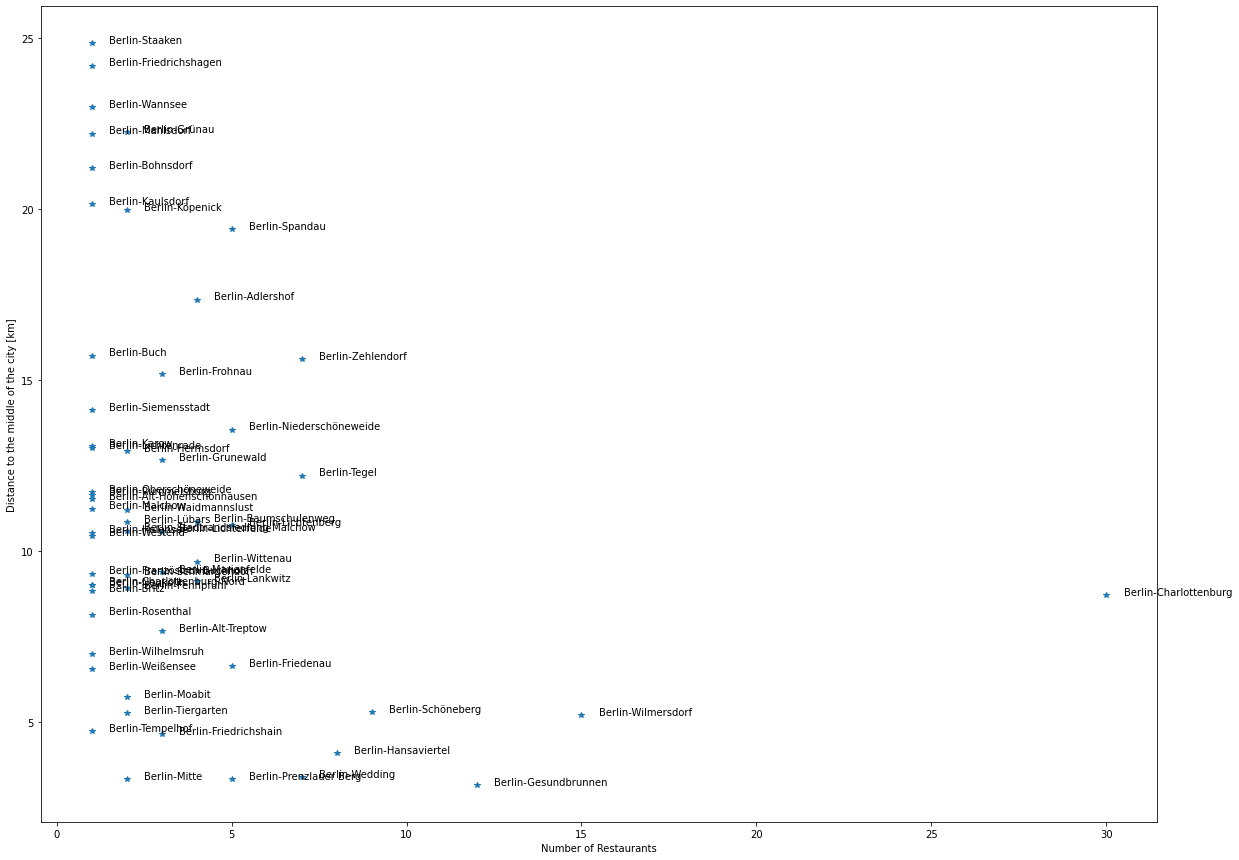

In [2599]:
# Berlin: 
# We search for neighborhoods outside the city with a lot of restaurants

mask_berlin_restaurants_in_neighborhood=berlin_venue_cat.sum(axis=1)>0
berlin_restaurants_in_neighborhood=berlin_venue_cat[mask_berlin_restaurants_in_neighborhood].reset_index(drop=True)

# Creating the X-Values for the diagramm:
X_Berlin=berlin_restaurants_in_neighborhood.groupby(by='Neighborhood').sum().sum(axis=1)

#Creating the Y-Values for the diagramm:
y_prep_berlin=berlin_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']].groupby('Neighborhood').mean().reset_index()
dist_berlin=[]
for y,x in list(zip(y_prep_berlin['Neighborhood Latitude'],y_prep_berlin['Neighborhood Longitude'])):
    dist=sqrt(abs(x-x_berlin)**2 + abs(y-y_berlin)**2)*100
    dist_berlin.append(dist)
y_prep_berlin['Distance']=dist_berlin
Y_Berlin=y_prep_berlin[y_prep_berlin['Neighborhood'].isin (list(X_Berlin.index))]


X_plot=list(X_Berlin)
Y_plot=list(Y_Berlin['Distance'])


fig=plt.figure(figsize=(20,15))
ax1=plt.plot(X_plot,Y_plot,'*',label=list(Y_Berlin['Neighborhood']))
for neighborhood,x,y in list(zip(Y_Berlin['Neighborhood'],X_plot,Y_plot)):
    plt.text(x+0.5,y+0.001,neighborhood)
plt.xlabel('Number of Restaurants')
plt.ylabel('Distance to the middle of the city [km]')
plt.savefig('distance_restaurants_berlin.png')

In [2600]:
# The plot gives us an impression of the relation between distance and the number of restaurants.
# Because we need to decrease the number of restaurants for our foursquare query, we split the data 
# by the criteria distance and number of restaurants. We will take everything within a distance of 5 km around the city-centre of Berlin.

# Creating a list with neighborhoods which are in a circle of 10 km around the inner city:
inner_city_radius = 10
list_berlin_inner_restaurants=Y_Berlin[Y_Berlin['Distance']<inner_city_radius]['Neighborhood'].reset_index(drop=True)

# Creating the venues list only of venues within these neighborhoods:
berlin_restaurants_in_neighborhood_inner=berlin_restaurants_in_neighborhood[berlin_restaurants_in_neighborhood['Neighborhood'].isin(list_berlin_inner_restaurants)].reset_index(drop=True)
print('Number of Restaurants inside the chosen "inner_city_radius" around Berlins centrum: ',len(berlin_restaurants_in_neighborhood_inner))

# Creating new grouping because we go on with the new venues list.
grouped_berlin_inner_restaurants=berlin_restaurants_in_neighborhood_inner.drop(['Venue','ID'],axis=1).groupby('Neighborhood').mean()
grouped_berlin_inner_restaurants.head(2)

Number of Restaurants inside the chosen "inner_city_radius" around Berlins centrum:  126


,African Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berlin-Alt-Treptow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
Berlin-Britz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### 2.6.2 Choosing the circle around the city-centrum of Paris:

Text(0, 0.5, 'Distance to the middle of the city [km]')

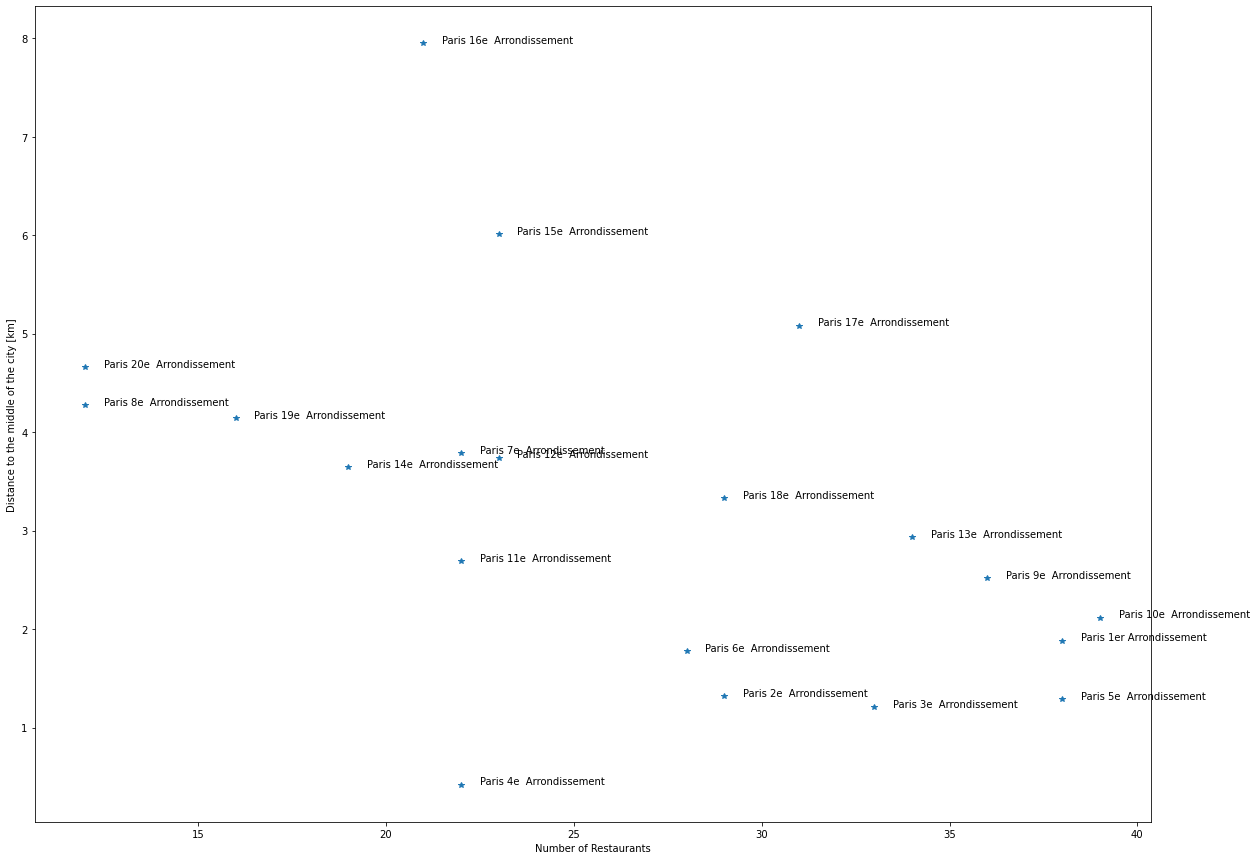

In [2601]:
# Paris: 
# We search for neighborhoods outside the city with a lot of restaurants

mask_paris_restaurants_in_neighborhood=paris_venue_cat.sum(axis=1)>0
paris_restaurants_in_neighborhood=paris_venue_cat[mask_paris_restaurants_in_neighborhood].reset_index(drop=True)

# Creating the X-Values for the diagramm:
X_Paris=paris_restaurants_in_neighborhood.groupby(by='Neighborhood').sum().sum(axis=1)

#Creating the Y-Values for the diagramm:
y_prep_paris=paris_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']].groupby('Neighborhood').mean().reset_index()
dist_paris=[]
for y,x in list(zip(y_prep_paris['Neighborhood Latitude'],y_prep_paris['Neighborhood Longitude'])):
    dist=sqrt(abs(x-x_paris)**2 + abs(y-y_paris)**2)*100
    dist_paris.append(dist)
y_prep_paris['Distance']=dist_paris
Y_Paris=y_prep_paris[y_prep_paris['Neighborhood'].isin (list(X_Paris.index))]


X_plot=list(X_Paris)
Y_plot=list(Y_Paris['Distance'])


fig=plt.figure(figsize=(20,15))
ax1=plt.plot(X_plot,Y_plot,'*',label=list(Y_Paris['Neighborhood']))
for neighborhood,x,y in list(zip(Y_Paris['Neighborhood'],X_plot,Y_plot)):
    plt.text(x+0.5,y+0.001,neighborhood)
plt.xlabel('Number of Restaurants')
plt.ylabel('Distance to the middle of the city [km]')

In [2602]:
# The plot gives us an impression of the relation between distance and the number of restaurants.
# Because we need to decrease the number of restaurants for our foursquare query, we split the data 
# by the criteria distance and number of restaurants. We will take everything within a distance of 2 km around the city-centre of Paris.

# Creating a list with neighborhoods which are in a circle of 2 km around the inner city:
inner_city_radius = 2
list_paris_inner_restaurants=Y_Paris[Y_Paris['Distance']<inner_city_radius]['Neighborhood'].reset_index(drop=True)

# Creating the venues list only of venues within these neighborhoods:
paris_restaurants_in_neighborhood_inner=paris_restaurants_in_neighborhood[paris_restaurants_in_neighborhood['Neighborhood'].isin(list_paris_inner_restaurants)].reset_index(drop=True)
print('Number of Restaurants inside the chosen "inner_city_radius" around Paris centrum: ',len(paris_restaurants_in_neighborhood_inner))

# Creating new grouping because we go on with the new venues list.
grouped_paris_inner_restaurants=paris_restaurants_in_neighborhood_inner.drop(['Venue','ID'],axis=1).groupby('Neighborhood').mean()
grouped_paris_inner_restaurants.head(2)


Number of Restaurants inside the chosen "inner_city_radius" around Paris centrum:  188


,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Basque Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Ch'ti Restaurant,Comfort Food Restaurant,Corsican Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Jewish Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Japanese-Like Restaurants
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Paris 1er Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.157895,0.0,0.000000,0.0,0.0,0.000000,0.026316,0.131579,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.026316,0.000000,0.0,0.0,0.026316,0.0,0.026316,0.0,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.578947
Paris 2e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.0,0.0,0.034483,0.310345,0.0,0.034483,0.0,0.0,0.034483,0.034483,0.103448,0.0,0.0,0.034483,0.0,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,0.034483,0.034483,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034483,0.068966,0.0,0.0,0.0,0.0,0.137931


#### 2.6.2 Choosing the circle around the city-centrum of London:

Text(0, 0.5, 'Distance to the middle of the city [km]')

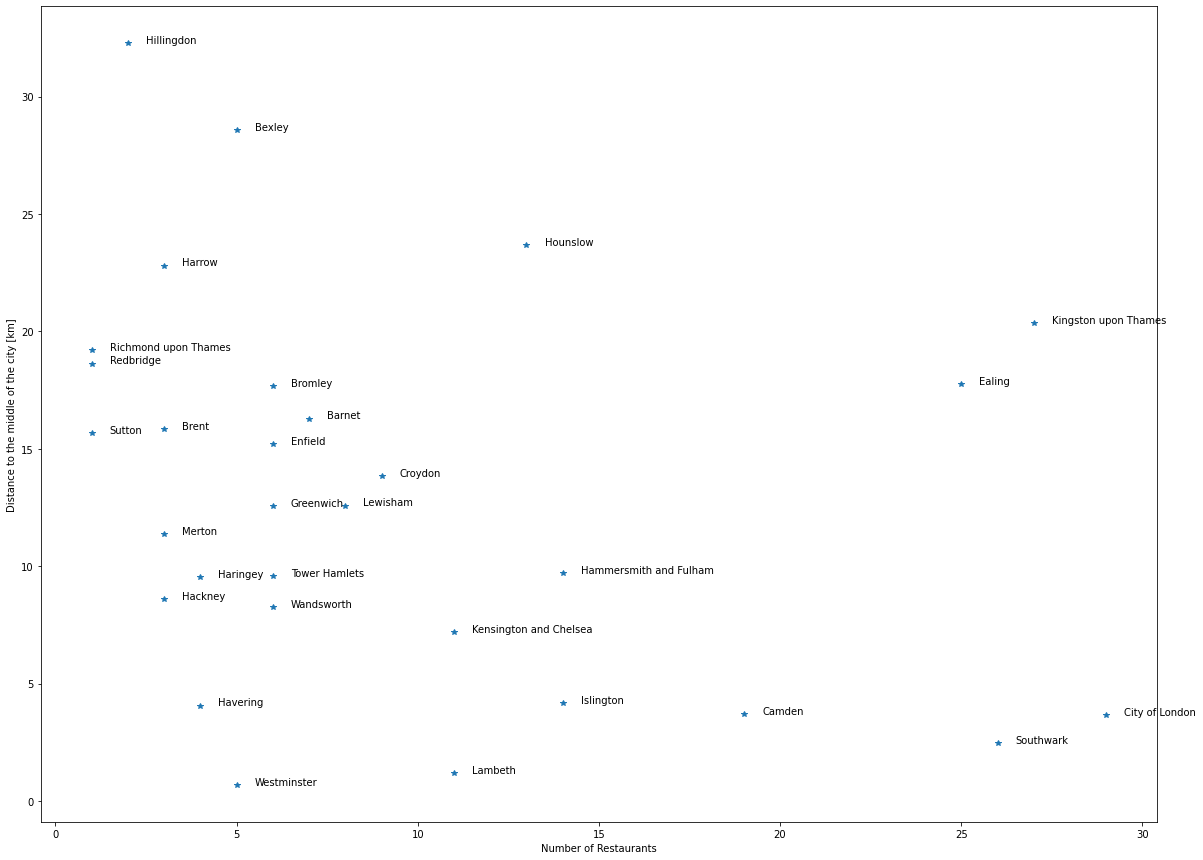

In [2603]:
# London: 
# We search for neighborhoods outside the city with a lot of restaurants

mask_london_restaurants_in_neighborhood=london_venue_cat.sum(axis=1)>0
london_restaurants_in_neighborhood=london_venue_cat[mask_london_restaurants_in_neighborhood].reset_index(drop=True)

# Creating the X-Values for the diagramm:
X_London=london_restaurants_in_neighborhood.groupby(by='Neighborhood').sum().sum(axis=1)

#Creating the Y-Values for the diagramm:
y_prep_london=london_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']].groupby('Neighborhood').mean().reset_index()
dist_london=[]
for y,x in list(zip(y_prep_london['Neighborhood Latitude'],y_prep_london['Neighborhood Longitude'])):
    dist=sqrt(abs(x-x_london)**2 + abs(y-y_london)**2)*100
    dist_london.append(dist)
y_prep_london['Distance']=dist_london
Y_London=y_prep_london[y_prep_london['Neighborhood'].isin (list(X_London.index))]


X_plot=list(X_London)
Y_plot=list(Y_London['Distance'])


fig=plt.figure(figsize=(20,15))
ax1=plt.plot(X_plot,Y_plot,'*',label=list(Y_London['Neighborhood']))
for neighborhood,x,y in list(zip(Y_London['Neighborhood'],X_plot,Y_plot)):
    plt.text(x+0.5,y+0.001,neighborhood)
plt.xlabel('Number of Restaurants')
plt.ylabel('Distance to the middle of the city [km]')

In [2604]:
# The plot gives us an impression of the relation between distance and the number of restaurants.
# Because we need to decrease the number of restaurants for our foursquare query, we split the data 
# by the criteria distance and number of restaurants. We will take everything within a distance of 10 km around the city-centre of London.

# Creating a list with neighborhoods which are in a circle of 10 km around the inner city:
inner_city_radius = 10
list_london_inner_restaurants=Y_London[Y_London['Distance']<inner_city_radius]['Neighborhood'].reset_index(drop=True)

# Creating the venues list only of venues within these neighborhoods:
london_restaurants_in_neighborhood_inner=london_restaurants_in_neighborhood[london_restaurants_in_neighborhood['Neighborhood'].isin(list_london_inner_restaurants)].reset_index(drop=True)
print('Number of Restaurants inside the chosen "inner_city_radius" around London centrum: ',len(london_restaurants_in_neighborhood_inner))

# Creating new grouping because we go on with the new venues list.
grouped_london_inner_restaurants=london_restaurants_in_neighborhood_inner.drop(['Venue','ID'],axis=1).groupby('Neighborhood').mean()
grouped_london_inner_restaurants.head(2)


Number of Restaurants inside the chosen "inner_city_radius" around London centrum:  152


,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dim Sum Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mamak Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Restaurant,Romanian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Camden,0.0,0.052632,0.052632,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.000000,0.000000,0.0,0.0,0.052632,0.0,0.0,0.000000,0.0,0.157895,0.052632,0.000000,0.0,0.052632,0.052632,0.0,0.0,0.052632,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.105263,0.263158
City of London,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.034483,0.034483,0.0,0.0,0.103448,0.0,0.0,0.068966,0.0,0.103448,0.000000,0.034483,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.068966,0.034483,0.0,0.0,0.0,0.068966,0.0,0.034483,0.103448,0.0,0.0,0.0,0.0,0.0,0.000000,0.310345


#### Lets calculate if its possible to make the Foursquare API Call (restricted to 500 per day):

In [2605]:
# First I print the total number of restaurants inside the chosen radius:
print('Number of Restaurants inside the chosen "inner_city_radius" around Berlins centrum: ',len(berlin_restaurants_in_neighborhood_inner))
print('Number of Restaurants inside the chosen "inner_city_radius" around Paris centrum: ',len(paris_restaurants_in_neighborhood_inner))
print('Number of Restaurants inside the chosen "inner_city_radius" around London centrum: ',len(london_restaurants_in_neighborhood_inner),'\n')
print('Total number of API Calls or in other words, total number of venues: ',len(berlin_restaurants_in_neighborhood_inner)+len(paris_restaurants_in_neighborhood_inner)+len(london_restaurants_in_neighborhood_inner))

Number of Restaurants inside the chosen "inner_city_radius" around Berlins centrum:  126
Number of Restaurants inside the chosen "inner_city_radius" around Paris centrum:  188
Number of Restaurants inside the chosen "inner_city_radius" around London centrum:  152 

Total number of API Calls or in other words, total number of venues:  466


#### Due to the fact that we have just 466 venues, our call will work.

### 2.7 Accessing the Foursquare data about the price niveau of the venues:

In [2606]:
# First I test how the get request works and waht it brings as anwser:

VENUE_ID='4c5190663940be9a0f2c0f09'
url_venue_id='https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                         CLIENT_ID,
                                                                                         CLIENT_SECRET,
                                                                                         VERSION
                                                                                         )
url_venue_id    

'https://api.foursquare.com/v2/venues/4c5190663940be9a0f2c0f09?&client_id=F52IQDHA343DRBLNO1UQLNW1VSQJZ4AMDELYGJO04MGQS2FY&client_secret=O0ARTXKT5NZOJAGWW4D1UOMJK42UXTNOD0HB3ONEEIT4LZJ4&v=20200101'

In [2607]:
import requests

json=requests.get(url_venue_id).json()
json

{'meta': {'code': 200, 'requestId': '602c0f5115eb872325c1f684'},
 'response': {'venue': {'id': '4c5190663940be9a0f2c0f09',
   'name': 'Goodman Steak House Restaurant',
   'contact': {'phone': '+442076008220',
    'formattedPhone': '+44 20 7600 8220',
    'twitter': 'goodman_meatman'},
   'location': {'address': '11 Old Jewry',
    'lat': 51.51439802733941,
    'lng': -0.09074537518056014,
    'labeledLatLngs': [{'label': 'display',
      'lat': 51.51439802733941,
      'lng': -0.09074537518056014}],
    'postalCode': 'EC2R 8DU',
    'cc': 'GB',
    'city': 'London',
    'state': 'Greater London',
    'country': 'United Kingdom',
    'formattedAddress': ['11 Old Jewry',
     'London',
     'Greater London',
     'EC2R 8DU',
     'United Kingdom']},
   'canonicalUrl': 'https://foursquare.com/v/goodman-steak-house-restaurant/4c5190663940be9a0f2c0f09',
   'categories': [{'id': '4bf58dd8d48988d1cc941735',
     'name': 'Steakhouse',
     'pluralName': 'Steakhouses',
     'shortName': 'Steakh

In [2608]:
# We just need the price informations about the venue:

venue_test_information=[json['response']['venue']['id'],json['response']['venue']['price']['tier'],json['response']['venue']['price']['message']]
venue_test_information
# We can see, that this restaurant is in categorie 3 what means that it is expensive. 
# The currency is not relevant for the question.

['4c5190663940be9a0f2c0f09', 3, 'Expensive']

#### In the next step, I create a loop to access the price informations about all 468 restaurants we have chosen before:

In [2609]:
# Access again the dataframes with the relevant restaurants in the inner circles of our cities:
berlin_restaurants_in_neighborhood_inner
paris_restaurants_in_neighborhood_inner
london_restaurants_in_neighborhood_inner

# Create a List of all venue ID's of the dataframes above:
list_of_relevant_venue_ids=list(berlin_restaurants_in_neighborhood_inner['ID'])+list(paris_restaurants_in_neighborhood_inner['ID'])+list(london_restaurants_in_neighborhood_inner['ID'])
len(list_of_relevant_venue_ids)

# Loop through the dataframes column 'ID' to access the JSON files for every Venue ID and save the content to list
list_of_jsons=[]
for venue_id in list_of_relevant_venue_ids:
    url_venue_id='https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venue_id,
                                                                                         CLIENT_ID,
                                                                                         CLIENT_SECRET,
                                                                                         VERSION
                                                                                         )
    json_venue_id=requests.get(url_venue_id).json()
    list_of_jsons.append(json_venue_id)


In [2610]:
# Now that this worked fine, we have 478 jsons in the list of jsons. To access the data and save
# the 'Venue ID', 'Price Category' and 'Price Category Text', I will loop again but this time, through the list of jsons:

list_of_relevant_venue_informations=[]
for json in list_of_jsons:
    try: 
        json['response']['venue']['price']
        venue_id_information1=[json['response']['venue']['id'],json['response']['venue']['price']]
        list_of_relevant_venue_informations.append(venue_id_information1)
    except:
        venue_id_information2=[json['response']['venue']['id'],'n.a.']
        list_of_relevant_venue_informations.append(venue_id_information2)

# Now lets see how many venues do not have a price-category:
number_of_missing_price_categories=0
for venue in list_of_relevant_venue_informations:
    if venue[1] =='n.a.':
        number_of_missing_price_categories+=1
print('Number of missing price categories: ',number_of_missing_price_categories)
print('Total number of accessed Jsons: ',len(list_of_jsons))

# Checking the Venue - IDs for double entries
ID_LIST=[]
for i,j in list_of_relevant_venue_informations:
    ID_LIST.append(i)
len(ID_LIST)
len(set(ID_LIST))

Number of missing price categories:  48
Total number of accessed Jsons:  466


466

#### Now we add the price categories to the venues dataframe "'city'_restaurants_in_neighborhood_inner"

In [2611]:
# Adding the price categories to the venues dataframe of BERLIN/PARIS/LONDON:

venue_ids=[]
price_category=[]
price_category_text=[]
for venue_id, price in list_of_relevant_venue_informations:
            if price == 'n.a.':
                venue_ids.append(venue_id)
                price_category.append('n.a.')
                price_category_text.append('n.a.')
            else:
                venue_ids.append(venue_id)
                price_category.append(price['tier'])
                price_category_text.append(price['message'])

df_of_rel_venue_information=pd.DataFrame(list(zip(venue_ids,price_category,price_category_text)))
df_of_rel_venue_information.rename(columns={0:'ID',1:'PriceCategory',2:'PriceCategoryText'},inplace=True)
df_of_rel_venue_information.head(4)

# BERLIN:
df_berlin_inner_restaurants_with_price=berlin_restaurants_in_neighborhood_inner.merge(df_of_rel_venue_information,on='ID')
# PARIS:
df_paris_inner_restaurants_with_price=paris_restaurants_in_neighborhood_inner.merge(df_of_rel_venue_information,on='ID')
# LONDON:
df_london_inner_restaurants_with_price=london_restaurants_in_neighborhood_inner.merge(df_of_rel_venue_information,on='ID')

df_london_inner_restaurants_with_price
df_paris_inner_restaurants_with_price
df_berlin_inner_restaurants_with_price


# Now the n.a. assigned rows need to be taken out of the dataset
# Berlin:
df_berlin_inner_restaurants_with_price=df_berlin_inner_restaurants_with_price[df_berlin_inner_restaurants_with_price['PriceCategory']!='n.a.'].reset_index(drop=True)
# Paris:
df_paris_inner_restaurants_with_price=df_paris_inner_restaurants_with_price[df_paris_inner_restaurants_with_price['PriceCategory']!='n.a.'].reset_index(drop=True)
# London:
df_london_inner_restaurants_with_price=df_london_inner_restaurants_with_price[df_london_inner_restaurants_with_price['PriceCategory']!='n.a.'].reset_index(drop=True)

print('New number of useful restaurants in Berlin: ',len(set(list(df_berlin_inner_restaurants_with_price['ID']))))
print('New number of useful restaurants in Paris: ',len(set(list(df_paris_inner_restaurants_with_price['ID']))))
print('New number of useful restaurants in London: ',len(set(list(df_london_inner_restaurants_with_price['ID']))))

df_berlin_inner_restaurants_with_price.head(3)

New number of useful restaurants in Berlin:  113
New number of useful restaurants in Paris:  169
New number of useful restaurants in London:  136


,Neighborhood,Venue,ID,African Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants,PriceCategory,PriceCategoryText
0,Berlin-Alt-Treptow,"Hafenräucherei Treptow ""Löcknitz""",4e0486ffd1649538d96d0821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,Moderate
1,Berlin-Alt-Treptow,Da Gelo,4f953548e4b03828ff00588f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Moderate
2,Berlin-Britz,Italo-Bistro,516a8a15e4b02cfb822cff85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Moderate


### 2.8 Last Grouping of Neighborhoods, now with price informations:

In [2612]:
# Grouping Neighborhoods of Berlin:
grouped_berlin_inner_neighborhood_price=df_berlin_inner_restaurants_with_price.groupby(['PriceCategoryText','Neighborhood']).mean().reset_index()
# Grouping Neighborhoods of Paris:
grouped_paris_inner_neighborhood_price=df_paris_inner_restaurants_with_price.groupby(['PriceCategoryText','Neighborhood']).mean().reset_index()
# Grouping Neighborhoods of London:
grouped_london_inner_neighborhood_price=df_london_inner_restaurants_with_price.groupby(['PriceCategoryText','Neighborhood']).mean().reset_index()

print('Number of Groups of Neighborhoods based on the price category of the restaurants in Berlin: ', len(grouped_berlin_inner_neighborhood_price))
print('Number of Groups of Neighborhoods based on the price category of the restaurants in Paris: ', len(grouped_paris_inner_neighborhood_price))
print('Number of Groups of Neighborhoods based on the price category of the restaurants in London: ', len(grouped_london_inner_neighborhood_price))
grouped_paris_inner_neighborhood_price.head()


Number of Groups of Neighborhoods based on the price category of the restaurants in Berlin:  40
Number of Groups of Neighborhoods based on the price category of the restaurants in Paris:  18
Number of Groups of Neighborhoods based on the price category of the restaurants in London:  29


,PriceCategoryText,Neighborhood,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Basque Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Ch'ti Restaurant,Comfort Food Restaurant,Corsican Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Jewish Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Japanese-Like Restaurants
0,Cheap,Paris 2e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cheap,Paris 3e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Cheap,Paris 4e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cheap,Paris 5e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,Cheap,Paris 6e Arrondissement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2613]:
# Creating an unique ID out of PriceCategoryText and Neighborhood for the classification:
# For Berlin:
grouped_berlin_inner_neighborhood_price['ID']=grouped_berlin_inner_neighborhood_price['PriceCategoryText']+','+grouped_berlin_inner_neighborhood_price['Neighborhood']
grouped_berlin_inner_neighborhood_price=grouped_berlin_inner_neighborhood_price.drop(['PriceCategoryText','Neighborhood'],axis=1).set_index('ID').reset_index()
#For Paris:
grouped_paris_inner_neighborhood_price['ID']=grouped_paris_inner_neighborhood_price['PriceCategoryText']+','+grouped_paris_inner_neighborhood_price['Neighborhood']
grouped_paris_inner_neighborhood_price=grouped_paris_inner_neighborhood_price.drop(['PriceCategoryText','Neighborhood'],axis=1).set_index('ID').reset_index()
#For London:
grouped_london_inner_neighborhood_price['ID']=grouped_london_inner_neighborhood_price['PriceCategoryText']+','+grouped_london_inner_neighborhood_price['Neighborhood']
grouped_london_inner_neighborhood_price=grouped_london_inner_neighborhood_price.drop(['PriceCategoryText','Neighborhood'],axis=1).set_index('ID').reset_index()

grouped_berlin_inner_neighborhood_price

,ID,African Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants
0,"Cheap,Berlin-Charlottenburg",0.0,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.777778
1,"Cheap,Berlin-Französisch Buchholz",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
2,"Cheap,Berlin-Friedenau",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.500000
3,"Cheap,Berlin-Friedrichshain",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,"Cheap,Berlin-Gesundbrunnen",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,"Cheap,Berlin-Hansaviertel",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.666667,0.000000,0.0,0.000000,0.333333,0.000000,0.000000
6,"Cheap,Berlin-Lankwitz",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000
7,"Cheap,Berlin-Mitte",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,"Cheap,Berlin-Prenzlauer Berg",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
9,"Cheap,Berlin-Schmargendorf",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000


### 2.9 Visualization of the restaurants in the three cities

In [2614]:
# Get coordinates for Berlin, Paris and London

geo = Nominatim(user_agent="1")

adress_berlin=geo.geocode('Berlin')
latitude_berlin=adress_berlin.latitude
longitude_berlin=adress_berlin.longitude

adress_paris=geo.geocode('Paris')
latitude_paris=adress_paris.latitude
longitude_paris=adress_paris.longitude

adress_london=geo.geocode('London')
latitude_london=adress_london.latitude
longitude_london=adress_london.longitude

#### Mapping the restaurants

In [2615]:
# Visualization of the restaurants in Berlin, Paris and London:

import folium

# Berlin:
map_berlin=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)
map_berlin_venues=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)
for lat_berlin, long_berlin in zip(list(berlin_venues['Venue Latitude']),list(berlin_venues['Venue Longitude'])):
    folium.Marker([lat_berlin,long_berlin]).add_to(map_berlin_venues)

# Paris:        
map_paris=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
map_paris_venues=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
for lat_paris,long_paris in zip(list(paris_venues['Venue Latitude']),list(paris_venues['Venue Longitude'])):
    folium.Marker([lat_paris,long_paris]).add_to(map_paris_venues)
        
# London:
map_london=folium.Map(location=[latitude_london,longitude_london],zoom_start=14)
map_london_venues=folium.Map(location=[latitude_london,longitude_london],zoom_start=14)
for lat_london,long_london in zip(list(london_venues['Venue Latitude']),list(london_venues['Venue Longitude'])):
    folium.Marker([lat_london,long_london]).add_to(map_london_venues)
        
#map_london_venues
#map_paris_venues
#map_berlin_venues

## 3. Sorting the Restaurants for the top 5 and then the top 10 restaurants per Neighborhood/Price.

In [2616]:
# Sort the values for the top 5 venue categories per neighborhood:
# First: Berlin

num_top_venues_berlin = 5

for ID in grouped_berlin_inner_neighborhood_price['ID']:
    print("----"+ID+"----")
    temp = grouped_berlin_inner_neighborhood_price[grouped_berlin_inner_neighborhood_price['ID'] == ID].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_berlin))
    print('\n')

----Cheap,Berlin-Charlottenburg----
                           venue    freq
0      Japanese-Like Restaurants  0.7778
1            American Restaurant  0.1111
2                Thai Restaurant  0.1111
3  Vegetarian / Vegan Restaurant  0.0000
4             Turkish Restaurant  0.0000


----Cheap,Berlin-Französisch Buchholz----
                           venue  freq
0      Japanese-Like Restaurants   1.0
1            American Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3             Turkish Restaurant   0.0
4                Thai Restaurant   0.0


----Cheap,Berlin-Friedenau----
                           venue  freq
0      Japanese-Like Restaurants   0.5
1                Thai Restaurant   0.5
2            American Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4             Turkish Restaurant   0.0


----Cheap,Berlin-Friedrichshain----
                           venue  freq
0             Falafel Restaurant   1.0
1             African Restaurant   0.0
2               Ke

In [2617]:
# Sort the values for the top 5 venue categories per neighborhood:
# Second: Paris

num_top_venues_paris = 5

for ID in grouped_paris_inner_neighborhood_price['ID']:
    print("----"+ID+"----")
    temp = grouped_paris_inner_neighborhood_price[grouped_paris_inner_neighborhood_price['ID'] == ID].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_paris))
    print('\n')

----Cheap,Paris 2e  Arrondissement----
                      venue  freq
0        Mexican Restaurant   0.5
1      Fast Food Restaurant   0.5
2         Afghan Restaurant   0.0
3       Romanian Restaurant   0.0
4  Mediterranean Restaurant   0.0


----Cheap,Paris 3e  Arrondissement----
                       venue  freq
0  Japanese-Like Restaurants   1.0
1  Latin American Restaurant   0.0
2   Mediterranean Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Cheap,Paris 4e  Arrondissement----
                      venue  freq
0        Falafel Restaurant   1.0
1         Afghan Restaurant   0.0
2       Romanian Restaurant   0.0
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0


----Cheap,Paris 5e  Arrondissement----
                       venue  freq
0  Japanese-Like Restaurants  0.50
1         Falafel Restaurant  0.25
2      Portuguese Restaurant  0.25
3        Romanian Restaurant  0.00
4   Mediterranean Restaurant  0.00


----Chea

In [2618]:
# Sort the values for the top 5 venue categories per neighborhood:
# Third: London

num_top_venues_london = 5

for ID in grouped_london_inner_neighborhood_price['ID']:
    print("----"+ID+"----")
    temp = grouped_london_inner_neighborhood_price[grouped_london_inner_neighborhood_price['ID'] == ID].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues_london))
    print('\n')

----Cheap,Camden----
                       venue  freq
0  Japanese-Like Restaurants   1.0
1         African Restaurant   0.0
2           Mamak Restaurant   0.0
3   Mediterranean Restaurant   0.0
4         Mexican Restaurant   0.0


----Cheap,City of London----
                       venue  freq
0  Japanese-Like Restaurants   1.0
1         African Restaurant   0.0
2           Mamak Restaurant   0.0
3   Mediterranean Restaurant   0.0
4         Mexican Restaurant   0.0


----Cheap,Hammersmith and Fulham----
                      venue  freq
0      Fast Food Restaurant   1.0
1         Afghan Restaurant   0.0
2          Malay Restaurant   0.0
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0


----Cheap,Haringey----
                      venue  freq
0      Fast Food Restaurant   1.0
1         Afghan Restaurant   0.0
2          Malay Restaurant   0.0
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0


----Cheap,Havering----
                       venue  f

In [2619]:
# We use the function to sort the restaurants in descending order for Berlin:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
berlin_inner_neighborhood_price_restaurants_sorted = pd.DataFrame(columns=columns)
berlin_inner_neighborhood_price_restaurants_sorted['ID'] = grouped_berlin_inner_neighborhood_price['ID']

for ind in np.arange(grouped_berlin_inner_neighborhood_price.shape[0]):
    berlin_inner_neighborhood_price_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_berlin_inner_neighborhood_price.iloc[ind, :], num_top_venues)

berlin_inner_neighborhood_price_restaurants_sorted.head()

,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"Cheap,Berlin-Charlottenburg",Japanese-Like Restaurants,American Restaurant,Thai Restaurant,Indian Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant
1,"Cheap,Berlin-Französisch Buchholz",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
2,"Cheap,Berlin-Friedenau",Japanese-Like Restaurants,Thai Restaurant,Indian Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant
3,"Cheap,Berlin-Friedrichshain",Falafel Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant
4,"Cheap,Berlin-Gesundbrunnen",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant


In [2620]:
# We use the function to sort the restaurants in descending order for Paris:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
paris_inner_neighborhood_price_restaurants_sorted = pd.DataFrame(columns=columns)
paris_inner_neighborhood_price_restaurants_sorted['ID'] = grouped_paris_inner_neighborhood_price['ID']

for ind in np.arange(grouped_paris_inner_neighborhood_price.shape[0]):
    paris_inner_neighborhood_price_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_paris_inner_neighborhood_price.iloc[ind, :], num_top_venues)

paris_inner_neighborhood_price_restaurants_sorted.head()

,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"Cheap,Paris 2e Arrondissement",Mexican Restaurant,Fast Food Restaurant,Japanese-Like Restaurants,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant
1,"Cheap,Paris 3e Arrondissement",Japanese-Like Restaurants,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
2,"Cheap,Paris 4e Arrondissement",Falafel Restaurant,Japanese-Like Restaurants,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant
3,"Cheap,Paris 5e Arrondissement",Japanese-Like Restaurants,Falafel Restaurant,Portuguese Restaurant,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant
4,"Cheap,Paris 6e Arrondissement",Mexican Restaurant,Japanese-Like Restaurants,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant


In [2621]:
# We use the function to sort the restaurants in descending order for London:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['ID']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
london_inner_neighborhood_price_restaurants_sorted = pd.DataFrame(columns=columns)
london_inner_neighborhood_price_restaurants_sorted['ID'] = grouped_london_inner_neighborhood_price['ID']

for ind in np.arange(grouped_london_inner_neighborhood_price.shape[0]):
    london_inner_neighborhood_price_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_london_inner_neighborhood_price.iloc[ind, :], num_top_venues)

london_inner_neighborhood_price_restaurants_sorted.head()

,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"Cheap,Camden",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
1,"Cheap,City of London",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
2,"Cheap,Hammersmith and Fulham",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
3,"Cheap,Haringey",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
4,"Cheap,Havering",Falafel Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant


## 4. Clustering the three Cities

### 4.1 Preparing the ClusterLabels for every city

In [2622]:
from sklearn.cluster import KMeans

# Set the Number of Clusters to calculate: 
n_c_berlin=6
n_c_paris=4
n_c_london=5

# Set the model for every city:
KM_Berlin=KMeans(n_clusters=n_c_berlin,init='k-means++')
KM_Paris=KMeans(n_clusters=n_c_paris,init='k-means++')
KM_London=KMeans(n_clusters=n_c_london,init='k-means++')


# Berlin:
X_Berlin=np.array(grouped_berlin_inner_neighborhood_price.iloc[:,1:])
KM_Berlin.fit(X_Berlin)
KM_Berlin.labels_
grouped_berlin_inner_neighborhood_price['Label']=KM_Berlin.labels_

# Paris:
X_Paris=np.array(grouped_paris_inner_neighborhood_price.iloc[:,1:])
KM_Paris.fit(X_Paris)
KM_Paris.labels_
grouped_paris_inner_neighborhood_price['Label']=KM_Paris.labels_

# London:
X_London=np.array(grouped_london_inner_neighborhood_price.iloc[:,1:])
KM_London.fit(X_London)
KM_London.labels_
grouped_london_inner_neighborhood_price['Label']=KM_London.labels_

grouped_berlin_inner_neighborhood_price.head()


,ID,African Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Kebab Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Japanese-Like Restaurants,Label
0,"Cheap,Berlin-Charlottenburg",0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.777778,0
1,"Cheap,Berlin-Französisch Buchholz",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0
2,"Cheap,Berlin-Friedenau",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0
3,"Cheap,Berlin-Friedrichshain",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,5
4,"Cheap,Berlin-Gesundbrunnen",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3


In [2623]:
# Merge the sorted restaurants dataframe and the new generated column 'Labels' which labels the cluster. 
# And add the longitude and the latitude to that dataframe.

# Merging most common restaurants and the generated Label:
berlin_merge_label_to_ID = pd.merge(berlin_inner_neighborhood_price_restaurants_sorted, grouped_berlin_inner_neighborhood_price[['ID','Label']], on=['ID'])


neigh_berlin=[]
price_cats_berlin=[]
for ID in berlin_merge_label_to_ID['ID']:
    price_cat, neighborhood = ID.split(',')
    neigh_berlin.append(neighborhood)
    price_cats_berlin.append(price_cat)
    
berlin_merge_label_to_ID['Neighborhood'] = neigh_berlin
berlin_merge_label_to_ID['PriceCategory'] = price_cats_berlin


# Getting a DataFrame of the Neighborhoods and their coordinates from berlin_venues:
berlin_neighborhood_coordinates = pd.DataFrame({'Neighborhood':berlin_venues['Neighborhood'].unique(),
                                                'Neighborhood Latitude':berlin_venues['Neighborhood Latitude'].unique(),
                                                'Neighborhood Longitude':berlin_venues['Neighborhood Longitude'].unique()}
                                              )
# Setting the Index of this new Dataframe berlin_neighborhood_coordinates as Neighborhood for the join procedure:
berlin_neighborhood_coordinates.set_index('Neighborhood',inplace=True)

# Creating the new Dataframe with clusters and coordinates of neighborhoods and price categories:
berlin_clusters=berlin_merge_label_to_ID.join(berlin_neighborhood_coordinates,how='left',on='Neighborhood')

berlin_clusters.head(3)



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude
0,"Cheap,Berlin-Charlottenburg",Japanese-Like Restaurants,American Restaurant,Thai Restaurant,Indian Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,0,Berlin-Charlottenburg,Cheap,52.504316,13.302645
1,"Cheap,Berlin-Französisch Buchholz",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,0,Berlin-Französisch Buchholz,Cheap,52.599186,13.433210
2,"Cheap,Berlin-Friedenau",Japanese-Like Restaurants,Thai Restaurant,Indian Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,0,Berlin-Friedenau,Cheap,52.470716,13.341500


### 4.2 Creating the final Dataframe for Berlin:

#### 4.2.1 Collecting all relevant informations to one dataframe:

In [2624]:
# Merge the sorted restaurants dataframe and the new generated column 'Labels' which labels the cluster. 
# And add the longitude and the latitude to that dataframe.

# Merging most common restaurants and the generated Label:
berlin_merge_label_to_ID = pd.merge(berlin_inner_neighborhood_price_restaurants_sorted, grouped_berlin_inner_neighborhood_price[['ID','Label']], on=['ID'])

# Creating new columns with neighborhood and price categories from the ID-column in the dataframe berlin_merge_label_to_ID
neigh_berlin=[]
price_cats_berlin=[]
for ID in berlin_merge_label_to_ID['ID']:
    price_cat, neighborhood = ID.split(',')
    neigh_berlin.append(neighborhood)
    price_cats_berlin.append(price_cat)
    
berlin_merge_label_to_ID['Neighborhood'] = neigh_berlin
berlin_merge_label_to_ID['PriceCategory'] = price_cats_berlin


# Getting a DataFrame of the Neighborhoods and their coordinates from berlin_venues:
berlin_neighborhood_coordinates = pd.DataFrame({'Neighborhood':berlin_venues['Neighborhood'].unique(),
                                                'Neighborhood Latitude':berlin_venues['Neighborhood Latitude'].unique(),
                                                'Neighborhood Longitude':berlin_venues['Neighborhood Longitude'].unique()
                                               }
                                              )
# Setting the Index of this new Dataframe berlin_neighborhood_coordinates as Neighborhood for the join procedure:
berlin_neighborhood_coordinates.set_index('Neighborhood',inplace=True)

# Creating the new Dataframe with clusters and coordinates of neighborhoods and price categories:
berlin_clusters=berlin_merge_label_to_ID.join(berlin_neighborhood_coordinates,how='left',on='Neighborhood')

berlin_clusters.head(2)



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude
0,"Cheap,Berlin-Charlottenburg",Japanese-Like Restaurants,American Restaurant,Thai Restaurant,Indian Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,0,Berlin-Charlottenburg,Cheap,52.504316,13.302645
1,"Cheap,Berlin-Französisch Buchholz",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,0,Berlin-Französisch Buchholz,Cheap,52.599186,13.433210


#### 4.2.2 Interpreting the clusters (Labels):

In [2632]:
# Searching for every Label number:

# Cluster No. 1:
berlin_clusters[berlin_clusters['Label']==1] # mostly Italian restaurants, second is Japanese.
berlin_1 = 'Italian - Japanese'

# Cluster No. 4:
berlin_clusters[berlin_clusters['Label']==4] # mostly not assigned restaurants, second is Japanese/Turkish.
berlin_4 = 'Restaurants - Japanese/Turkish' 

# Cluster No. 2:
berlin_clusters[berlin_clusters['Label']==2] # mostly German restaurants, second is Japanese/Italian and third is Japanese/Italian. 
berlin_2 = 'German - Japanese/Italian'

# Cluster No. 0:
berlin_clusters[berlin_clusters['Label']==0] # mostly Japanese restaurants, second is mostly South-eastern, Eastern and Vegetarian.
berlin_0 = 'Japanese - South Eastern/Vegetarian'

# Cluster No. 5:
berlin_clusters[berlin_clusters['Label']==5] # mixed restaurants but none of it is Japanese, second are Japanese/SouthAmerican and French.
berlin_5 = 'Mixed - Japanese/Argentinian'

# Cluster No. 3:
berlin_clusters[berlin_clusters['Label']==3] # mostly fast food restaurants, second are Japanese followed by Vegetarian restaurants
berlin_3 = 'Fast Food - Japanese'



In [2633]:
# Creating a list which attributes the interpreted meaning of the cluster to the label number of the cluster:

attributed_labels_berlin=np.array([[0,1,2,3,4,5],[berlin_0,berlin_1,berlin_2,berlin_3,berlin_4,berlin_5]])

attributed_labels_berlin=pd.DataFrame(attributed_labels_berlin).T.rename(columns={0:'Label',1:'ClusterInterpretation'})

# Adding the cluster interpretations to the berlin_clusters dataframe:
cluster_interpretations=[]
count=-1    
for label1 in list(berlin_clusters.Label):
    for label2,cluster_interpretation in list(zip(list(attributed_labels_berlin['Label']),
                                                  list(attributed_labels_berlin['ClusterInterpretation']))):
        label2_int=int(label2)
        if label1==label2_int:
            cluster_interpretations.append(cluster_interpretation)

berlin_clusters['ClusterInterpretation']=cluster_interpretations

berlin_clusters.head(4)



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude,ClusterInterpretation
0,"Cheap,Berlin-Charlottenburg",Japanese-Like Restaurants,American Restaurant,Thai Restaurant,Indian Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,0,Berlin-Charlottenburg,Cheap,52.504316,13.302645,Japanese - South Eastern/Vegetarian
1,"Cheap,Berlin-Französisch Buchholz",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,0,Berlin-Französisch Buchholz,Cheap,52.599186,13.433210,Japanese - South Eastern/Vegetarian
2,"Cheap,Berlin-Friedenau",Japanese-Like Restaurants,Thai Restaurant,Indian Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,0,Berlin-Friedenau,Cheap,52.470716,13.341500,Japanese - South Eastern/Vegetarian
3,"Cheap,Berlin-Friedrichshain",Falafel Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,American Restaurant,Argentinian Restaurant,Bavarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Comfort Food Restaurant,Doner Restaurant,5,Berlin-Friedrichshain,Cheap,52.510382,13.434911,Mixed - Japanese/Argentinian


### 4.3 Creating the final Dataframe for Paris:

#### 4.3.1 Collecting all relevant informations to one dataframe:

In [2634]:
# Merge the sorted restaurants dataframe and the new generated column 'Labels' which labels the cluster. 
# And add the longitude and the latitude to that dataframe.

# Merging most common restaurants and the generated Label:
paris_merge_label_to_ID = pd.merge(paris_inner_neighborhood_price_restaurants_sorted, grouped_paris_inner_neighborhood_price[['ID','Label']], on=['ID'])

# Creating new columns with neighborhood and price categories from the ID-column in the dataframe paris_merge_label_to_ID
neigh_paris=[]
price_cats_paris=[]
for ID in paris_merge_label_to_ID['ID']:
    price_cat, neighborhood = ID.split(',')
    neigh_paris.append(neighborhood)
    price_cats_paris.append(price_cat)
    
paris_merge_label_to_ID['Neighborhood'] = neigh_paris
paris_merge_label_to_ID['PriceCategory'] = price_cats_paris


# Getting a DataFrame of the Neighborhoods and their coordinates from paris_venues:
paris_neighborhood_coordinates = pd.DataFrame({'Neighborhood':paris_venues['Neighborhood'].unique(),
                                                'Neighborhood Latitude':paris_venues['Neighborhood Latitude'].unique(),
                                                'Neighborhood Longitude':paris_venues['Neighborhood Longitude'].unique()
                                              }
                                              )
# Setting the Index of this new Dataframe paris_neighborhood_coordinates as Neighborhood for the join procedure:
paris_neighborhood_coordinates.set_index('Neighborhood',inplace=True)

# Creating the new Dataframe with clusters and coordinates of neighborhoods and price categories:
paris_clusters=paris_merge_label_to_ID.join(paris_neighborhood_coordinates,how='left',on='Neighborhood')

paris_clusters.head(2)



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude
0,"Cheap,Paris 2e Arrondissement",Mexican Restaurant,Fast Food Restaurant,Japanese-Like Restaurants,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,2,Paris 2e Arrondissement,Cheap,48.867542,2.343952
1,"Cheap,Paris 3e Arrondissement",Japanese-Like Restaurants,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,1,Paris 3e Arrondissement,Cheap,48.864212,2.360936


#### 4.3.2 Interpreting the clusters (Labels):

In [2646]:
# Searching for every Label number:

# Cluster No. 1:
paris_clusters[paris_clusters['Label']==1] # mostly Japanese and Italian restaurants, second are South European,North African and Japanese
paris_1 = 'Japanese - Japanese/South European/North African'

# Cluster No. 0:
paris_clusters[paris_clusters['Label']==0] # mostly French restaurants, second is Japanese and Seafood as well as American and Italian.
paris_0 = 'French - Seafood/Japanese'

# Cluster No. 2:
paris_clusters[paris_clusters['Label']==2] # mostly Mexican restaurants, second is Japanese and Fast Food. 
paris_2 = 'Mexican - Japanese/Fast Food'

# Cluster No. 3:
paris_clusters[paris_clusters['Label']==3] # Falafel restaurants, second are Japanese restaurants.
paris_3 = 'Falafel - Japanese'


In [2647]:
# Creating a list which attributes the interpreted meaning of the cluster to the label number of the cluster:

attributed_labels_paris=np.array([[0,1,2,3],[paris_0,paris_1,paris_2,paris_3]])

attributed_labels_paris=pd.DataFrame(attributed_labels_paris).T.rename(columns={0:'Label',1:'ClusterInterpretation'})

# Adding the cluster interpretations to the berlin_clusters dataframe:
cluster_interpretations=[]
count=-1    
for label1 in list(paris_clusters.Label):
    for label2,cluster_interpretation in list(zip(list(attributed_labels_paris['Label']),
                                                  list(attributed_labels_paris['ClusterInterpretation']))):
        label2_int=int(label2)
        if label1==label2_int:
            cluster_interpretations.append(cluster_interpretation)

paris_clusters['ClusterInterpretation']=cluster_interpretations

paris_clusters.head(4)



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude,ClusterInterpretation
0,"Cheap,Paris 2e Arrondissement",Mexican Restaurant,Fast Food Restaurant,Japanese-Like Restaurants,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,2,Paris 2e Arrondissement,Cheap,48.867542,2.343952,Mexican - Japanese/Fast Food
1,"Cheap,Paris 3e Arrondissement",Japanese-Like Restaurants,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,1,Paris 3e Arrondissement,Cheap,48.864212,2.360936,Japanese - Japanese/South European/North African
2,"Cheap,Paris 4e Arrondissement",Falafel Restaurant,Japanese-Like Restaurants,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant,3,Paris 4e Arrondissement,Cheap,48.856202,2.355619,Falafel - Japanese
3,"Cheap,Paris 5e Arrondissement",Japanese-Like Restaurants,Falafel Restaurant,Portuguese Restaurant,Comfort Food Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,1,Paris 5e Arrondissement,Cheap,48.845973,2.344350,Japanese - Japanese/South European/North African


### 4.4 Creating the final Dataframe for London:

#### 4.4.1 Collecting all relevant informations to one dataframe:

In [2648]:
# Merge the sorted restaurants dataframe and the new generated column 'Labels' which labels the cluster. 
# And add the longitude and the latitude to that dataframe.

# Merging most common restaurants and the generated Label:
london_merge_label_to_ID = pd.merge(london_inner_neighborhood_price_restaurants_sorted, grouped_london_inner_neighborhood_price[['ID','Label']], on=['ID'])

# Creating new columns with neighborhood and price categories from the ID-column in the dataframe paris_merge_label_to_ID
neigh_london=[]
price_cats_london=[]
for ID in london_merge_label_to_ID['ID']:
    price_cat, neighborhood = ID.split(',')
    neigh_london.append(neighborhood)
    price_cats_london.append(price_cat)
    
london_merge_label_to_ID['Neighborhood'] = neigh_london
london_merge_label_to_ID['PriceCategory'] = price_cats_london


# Getting a DataFrame of the Neighborhoods and their coordinates from paris_venues:
london_neighborhood_coordinates = pd.DataFrame({'Neighborhood':london_venues['Neighborhood'].unique(),
                                                'Neighborhood Latitude':london_venues['Neighborhood Latitude'].unique(),
                                                'Neighborhood Longitude':london_venues['Neighborhood Longitude'].unique()
                                              }
                                              )
# Setting the Index of this new Dataframe paris_neighborhood_coordinates as Neighborhood for the join procedure:
london_neighborhood_coordinates.set_index('Neighborhood',inplace=True)

# Creating the new Dataframe with clusters and coordinates of neighborhoods and price categories:
london_clusters=london_merge_label_to_ID.join(london_neighborhood_coordinates,how='left',on='Neighborhood')

london_clusters.head()



,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude
0,"Cheap,Camden",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,3,Camden,Cheap,51.542305,-0.139560
1,"Cheap,City of London",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,3,City of London,Cheap,51.515618,-0.091998
2,"Cheap,Hammersmith and Fulham",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,1,Hammersmith and Fulham,Cheap,51.492038,-0.223640
3,"Cheap,Haringey",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,1,Haringey,Cheap,51.601474,-0.111782
4,"Cheap,Havering",Falafel Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,2,Havering,Cheap,51.544385,-0.144307


#### 4.4.2 Interpreting the clusters (Labels):

In [2656]:
# Searching for every Label number:

# Cluster No. 2:
london_clusters[london_clusters['Label']==2] # Falafel restaurants, second are Japanese and third Vegetarian restaurants.
london_2 = 'Falafel - Japanese'

# Cluster No. 0:
london_clusters[london_clusters['Label']==0] # mixed restaurants with Japanese restaurants, second is mixed as well.
london_0 = 'Mixed/Japanese - Mixed'

# Cluster No. 1:
london_clusters[london_clusters['Label']==1] # mostly Fast Food restaurants, second is Japanese and third  Vegetarian restaurants. 
london_1 = 'Fast Food - Japanese'

# Cluster No. 4:
london_clusters[london_clusters['Label']==4] # mostly Tapas restaurants, second Japanese.
london_4 = 'Tapas - Japanese'

# Cluster No. 3:
london_clusters[london_clusters['Label']==3] # mostly Japanese restaurants, second Vegetarian and Unspecified or Thai, FastFood and Vegetarian.
london_3 = 'Japanese - Vegetarian/mixed'


In [2657]:
# Creating a list which attributes the interpreted meaning of the cluster to the label number of the cluster:

attributed_labels_london=np.array([[0,1,2,3,4],[london_0,london_1,london_2,london_3, london_4]])

attributed_labels_london=pd.DataFrame(attributed_labels_london).T.rename(columns={0:'Label',1:'ClusterInterpretation'})

# Adding the cluster interpretations to the berlin_clusters dataframe:
cluster_interpretations=[]
count=-1    
for label1 in list(london_clusters.Label):
    for label2,cluster_interpretation in list(zip(list(attributed_labels_london['Label']),
                                                  list(attributed_labels_london['ClusterInterpretation']))):
        label2_int=int(label2)
        if label1==label2_int:
            cluster_interpretations.append(cluster_interpretation)

london_clusters['ClusterInterpretation']=cluster_interpretations

london_clusters.head(4)

,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude,ClusterInterpretation
0,"Cheap,Camden",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,3,Camden,Cheap,51.542305,-0.139560,Japanese - Vegetarian/mixed
1,"Cheap,City of London",Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,3,City of London,Cheap,51.515618,-0.091998,Japanese - Vegetarian/mixed
2,"Cheap,Hammersmith and Fulham",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,1,Hammersmith and Fulham,Cheap,51.492038,-0.223640,Fast Food - Japanese
3,"Cheap,Haringey",Fast Food Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,1,Haringey,Cheap,51.601474,-0.111782,Fast Food - Japanese


## 5. Visualization of Clusters:

## 5.1 Berlin:

In [2660]:
# Get the Folium Map of Berlin:

import matplotlib as plt
import matplotlib.colors as mcolor
from folium import plugins


# Choosing the colormap: First choosing the colormap('Rainbow') and then choosing the number of colors(count of clusters for each city)
colors=plt.cm.get_cmap('hsv')

#Accessing Colors and saving them in a list:
color_list=[]
for i in np.linspace(0,1,len(range(n_c_berlin))+1):
    rgba=colors(i)
    rgba_transl=mcolor.rgb2hex(rgba)
    color_list.append(rgba_transl)


# Creating a new list with numbers for the price categories to change the size of the markers with these numbers in the folium map:
price_cat_numbers_berlin=[]
price_cats_berlin=list(zip(list(set(berlin_clusters['PriceCategory'])),[2,1,3])) # This list can be generated by examining first the set of the price categories, then adding the numbers 1 to 3 as the categories are.
for cat in list(berlin_clusters['PriceCategory']):
    for cat_single,cat_single_number in price_cats_berlin:
        if cat == cat_single:
            price_cat_numbers_berlin.append(cat_single_number)
 

print(list(zip(berlin_clusters['PriceCategory'],price_cat_numbers_berlin)))
list(set(berlin_clusters['PriceCategory']))

[('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Expensive', 3), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2)]


['Moderate', 'Cheap', 'Expensive']

### 5.1.1 Berlin - Price Category Cheap:

In [2661]:
# Creating the folium map:
# Creating the Map of Berlin
map_berlin=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(berlin_clusters['Neighborhood'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          berlin_clusters['Label'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          berlin_clusters['ClusterInterpretation'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          berlin_clusters['PriceCategory'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          berlin_clusters['Neighborhood Latitude'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          berlin_clusters['Neighborhood Longitude'][berlin_clusters['PriceCategory']=='Cheap'],
                                                                          [number for number in price_cat_numbers_berlin if number == 1])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_berlin)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_berlin['ClusterInterpretation'])
scaler_names=list(attributed_labels_berlin['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = '0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())+ ' 5: {}'.format([name for name in scaler_names][5].split('-')[0].strip())
map_berlin.add_child(colormap)    
    
map_berlin



### 5.1.2 Berlin - Price Category Moderate:

In [2662]:
# Creating the folium map:
# Creating the Map of Berlin
map_berlin=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)

for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(berlin_clusters['Neighborhood'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          berlin_clusters['Label'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          berlin_clusters['ClusterInterpretation'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          berlin_clusters['PriceCategory'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          berlin_clusters['Neighborhood Latitude'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          berlin_clusters['Neighborhood Longitude'][berlin_clusters['PriceCategory']=='Moderate'],
                                                                          [number for number in price_cat_numbers_berlin if number==2])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret) +'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_berlin)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_berlin['ClusterInterpretation'])
scaler_names=list(attributed_labels_berlin['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = '0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())+ ' 5: {}'.format([name for name in scaler_names][5].split('-')[0].strip())
map_berlin.add_child(colormap)    
    
map_berlin

### 5.1.3 Berlin - Price category Expensive:

In [2663]:
# Creating the folium map:
# Creating the Map of Berlin
map_berlin=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)

for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(berlin_clusters['Neighborhood'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          berlin_clusters['Label'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          berlin_clusters['ClusterInterpretation'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          berlin_clusters['PriceCategory'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          berlin_clusters['Neighborhood Latitude'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          berlin_clusters['Neighborhood Longitude'][berlin_clusters['PriceCategory']=='Expensive'],
                                                                          [number for number in price_cat_numbers_berlin if number==3])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret) +'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_berlin)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_berlin['ClusterInterpretation'])
scaler_names=list(attributed_labels_berlin['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = '0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())+ ' 5: {}'.format([name for name in scaler_names][5].split('-')[0].strip())
map_berlin.add_child(colormap)    
    
map_berlin

### 5.1.4 Berlin - Price category Very Expensive

In [2664]:
# Creating the folium map:
# Creating the Map of Berlin
map_berlin=folium.Map(location=[latitude_berlin,longitude_berlin],zoom_start=12)

for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(berlin_clusters['Neighborhood'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          berlin_clusters['Label'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          berlin_clusters['ClusterInterpretation'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          berlin_clusters['PriceCategory'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          berlin_clusters['Neighborhood Latitude'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          berlin_clusters['Neighborhood Longitude'][berlin_clusters['PriceCategory']=='Very Expensive'],
                                                                          [number for number in price_cat_numbers_berlin if number==4])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret) +'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_berlin)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_berlin['ClusterInterpretation'])
scaler_names=list(attributed_labels_berlin['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = '0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())+ ' 5: {}'.format([name for name in scaler_names][5].split('-')[0].strip())
map_berlin.add_child(colormap)    
    
map_berlin

#### As a result, Berlin Wilmersdorf is a good location for a high priced Japanese restaurant.


## 5.2 Paris:

In [2666]:
# Import necessary things:

import matplotlib as plt
import matplotlib.colors as mcolor
from folium import plugins


# Choosing the colormap: First choosing the colormap('Rainbow') and then choosing the number of colors(count of clusters for each city)
colors=plt.cm.get_cmap('hsv')

#Accessing Colors and saving them in a list:
color_list=[]
for i in np.linspace(0,1,len(range(n_c_paris))+1):
    rgba=colors(i)
    rgba_transl=mcolor.rgb2hex(rgba)
    color_list.append(rgba_transl)


# Creating a new list with numbers for the price categories to change the size of the markers with these numbers in the folium map:
price_cat_numbers_paris=[]
price_cats_paris=list(zip(list(set(paris_clusters['PriceCategory'])),[2,1,4,3])) # This list can be generated by examining first the set of the price categories, then adding the numbers 1 to 4 as the categories are.
for cat in list(paris_clusters['PriceCategory']):
    for cat_single,cat_single_number in price_cats_paris:
        if cat == cat_single:
            price_cat_numbers_paris.append(cat_single_number)
 

print(list(zip(paris_clusters['PriceCategory'],price_cat_numbers_paris)))
list(set(paris_clusters['PriceCategory']))

[('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Very Expensive', 4)]


['Moderate', 'Cheap', 'Very Expensive', 'Expensive']

### 5.2.1 Paris - Price category Cheap

In [2667]:
# Creating the folium map:
# Creating the Map of Paris
map_paris=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(paris_clusters['Neighborhood'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          paris_clusters['Label'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          paris_clusters['ClusterInterpretation'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          paris_clusters['PriceCategory'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          paris_clusters['Neighborhood Latitude'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          paris_clusters['Neighborhood Longitude'][paris_clusters['PriceCategory']=='Cheap'],
                                                                          [number for number in price_cat_numbers_paris if number == 1])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_paris)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_paris['ClusterInterpretation'])
scaler_names=list(attributed_labels_paris['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = 'Cluster 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' Cluster 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' Cluster 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' Cluster 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())
map_paris.add_child(colormap)
    
map_paris

### 5.2.2 Paris - Price category Moderate

In [2668]:
# Creating the folium map:
# Creating the Map of Paris
map_paris=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(paris_clusters['Neighborhood'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          paris_clusters['Label'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          paris_clusters['ClusterInterpretation'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          paris_clusters['PriceCategory'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          paris_clusters['Neighborhood Latitude'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          paris_clusters['Neighborhood Longitude'][paris_clusters['PriceCategory']=='Moderate'],
                                                                          [number for number in price_cat_numbers_paris if number == 2])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_paris)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_paris['ClusterInterpretation'])
scaler_names=list(attributed_labels_paris['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = 'Cluster 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' Cluster 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' Cluster 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' Cluster 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())
map_paris.add_child(colormap)
    
map_paris

### 5.2.3 Paris - Price category Expensive

In [2669]:
# Creating the folium map:
# Creating the Map of Paris
map_paris=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(paris_clusters['Neighborhood'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          paris_clusters['Label'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          paris_clusters['ClusterInterpretation'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          paris_clusters['PriceCategory'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          paris_clusters['Neighborhood Latitude'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          paris_clusters['Neighborhood Longitude'][paris_clusters['PriceCategory']=='Expensive'],
                                                                          [number for number in price_cat_numbers_paris if number == 3])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_paris)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_paris['ClusterInterpretation'])
scaler_names=list(attributed_labels_paris['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = 'Cluster 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' Cluster 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' Cluster 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' Cluster 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())
map_paris.add_child(colormap)    
 
map_paris

### 5.2.4 Paris - Price category Very Expensive

In [2670]:
# Creating the folium map:
# Creating the Map of Paris
map_paris=folium.Map(location=[latitude_paris,longitude_paris],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(paris_clusters['Neighborhood'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          paris_clusters['Label'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          paris_clusters['ClusterInterpretation'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          paris_clusters['PriceCategory'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          paris_clusters['Neighborhood Latitude'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          paris_clusters['Neighborhood Longitude'][paris_clusters['PriceCategory']=='Very Expensive'],
                                                                          [number for number in price_cat_numbers_paris if number == 4])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_paris)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_paris['ClusterInterpretation'])
scaler_names=list(attributed_labels_paris['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = 'Cluster 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' Cluster 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' Cluster 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' Cluster 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())
map_paris.add_child(colormap)

map_paris



#### As a result, we can say that in Paris the 1er Arrondissement is a good location for a high priced new Japanese restaurant. 
#### Because there are as well non-japanese restaurants in the expansive category they may be good locations also. This are the 2eme, 3eme, 4eme, 5eme and 6eme Arrondissements

## 5.3 London:

In [2671]:
# Import necessary things:

import matplotlib as plt
import matplotlib.colors as mcolor
from folium import plugins


# Choosing the colormap: First choosing the colormap('Rainbow') and then choosing the number of colors(count of clusters for each city)
colors=plt.cm.get_cmap('hsv')

#Accessing Colors and saving them in a list:
color_list=[]
for i in np.linspace(0,1,len(range(n_c_london))+1):
    rgba=colors(i)
    rgba_transl=mcolor.rgb2hex(rgba)
    color_list.append(rgba_transl)


# Creating a new list with numbers for the price categories to change the size of the markers with these numbers in the folium map:
price_cat_numbers_london=[]
price_cats_london=list(zip(list(set(london_clusters['PriceCategory'])),[2,1,3])) # This list can be generated by examining first the set of the price categories, then adding the numbers 1 to 4 as the categories are.
for cat in list(london_clusters['PriceCategory']):
    for cat_single,cat_single_number in price_cats_london:
        if cat == cat_single:
            price_cat_numbers_london.append(cat_single_number)
 

print(list(zip(london_clusters['PriceCategory'],price_cat_numbers_london)))
list(set(london_clusters['PriceCategory']))

[('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Cheap', 1), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Expensive', 3), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2), ('Moderate', 2)]


['Moderate', 'Cheap', 'Expensive']

### 5.3.1 London - Price category Cheap

In [2672]:
# Creating the folium map:
# Creating the Map of Paris
map_london=folium.Map(location=[latitude_london,longitude_london],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(london_clusters['Neighborhood'][london_clusters['PriceCategory']=='Cheap'],
                                                                          london_clusters['Label'][london_clusters['PriceCategory']=='Cheap'],
                                                                          london_clusters['ClusterInterpretation'][london_clusters['PriceCategory']=='Cheap'],
                                                                          london_clusters['PriceCategory'][london_clusters['PriceCategory']=='Cheap'],
                                                                          london_clusters['Neighborhood Latitude'][london_clusters['PriceCategory']=='Cheap'],
                                                                          london_clusters['Neighborhood Longitude'][london_clusters['PriceCategory']=='Cheap'],
                                                                          [number for number in price_cat_numbers_london if number == 1])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_london)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_london['ClusterInterpretation'])
scaler_names=list(attributed_labels_london['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = ' 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())
map_london.add_child(colormap)
    
map_london

### 5.3.2 London - Price category Moderate

In [2673]:
# Creating the folium map:
# Creating the Map of Paris
map_london=folium.Map(location=[latitude_london,longitude_london],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(london_clusters['Neighborhood'][london_clusters['PriceCategory']=='Moderate'],
                                                                          london_clusters['Label'][london_clusters['PriceCategory']=='Moderate'],
                                                                          london_clusters['ClusterInterpretation'][london_clusters['PriceCategory']=='Moderate'],
                                                                          london_clusters['PriceCategory'][london_clusters['PriceCategory']=='Moderate'],
                                                                          london_clusters['Neighborhood Latitude'][london_clusters['PriceCategory']=='Moderate'],
                                                                          london_clusters['Neighborhood Longitude'][london_clusters['PriceCategory']=='Moderate'],
                                                                          [number for number in price_cat_numbers_london if number == 2])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_london)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_london['ClusterInterpretation'])
scaler_names=list(attributed_labels_london['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = ' 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())
map_london.add_child(colormap)
    
map_london

### 5.3.3 London - Price category Expensive

In [2675]:
# Creating the folium map:
# Creating the Map of Paris
map_london=folium.Map(location=[latitude_london,longitude_london],zoom_start=12)
for neigh,label,interpret,price_cat,lat,long,price_cat_number in list(zip(london_clusters['Neighborhood'][london_clusters['PriceCategory']=='Expensive'],
                                                                          london_clusters['Label'][london_clusters['PriceCategory']=='Expensive'],
                                                                          london_clusters['ClusterInterpretation'][london_clusters['PriceCategory']=='Expensive'],
                                                                          london_clusters['PriceCategory'][london_clusters['PriceCategory']=='Expensive'],
                                                                          london_clusters['Neighborhood Latitude'][london_clusters['PriceCategory']=='Expensive'],
                                                                          london_clusters['Neighborhood Longitude'][london_clusters['PriceCategory']=='Expensive'],
                                                                          [number for number in price_cat_numbers_london if number == 3])):
    folium.CircleMarker(
    location=[lat, long],
    radius=price_cat_number*10,
    popup=str(neigh)+'\n'+'Cluster: '+str(label)+ '\n' +'Cluster Interpretation: '+str(interpret)+'\n'+ 'Price: ' + price_cat,
    color=color_list[label],
    fill=True,
    fill_color=color_list[label],
).add_to(map_london)

# Add a colormap legend to the map:
import branca.colormap as cm

scaler=len(attributed_labels_london['ClusterInterpretation'])
scaler_names=list(attributed_labels_london['ClusterInterpretation'])
colormap = cm.StepColormap(color_list, index=list(range(scaler+1)), vmin=min(list(range(scaler))), vmax=max(list(range(scaler+1))),caption=scaler_names)
colormap.caption = ' 0: {}'.format([name for name in scaler_names][0].split('-')[0].strip())+ ' 1: {}'.format([name for name in scaler_names][1].split('-')[0].strip())+ ' 2: {}'.format([name for name in scaler_names][2].split('-')[0].strip())+ ' 3: {}'.format([name for name in scaler_names][3].split('-')[0].strip())+ ' 4: {}'.format([name for name in scaler_names][4].split('-')[0].strip())
map_london.add_child(colormap)
    
map_london

#### In London are just three price ctegories for the existing venues. The expensive price categories shows a lot of Japanese restaurants in the clusters. They are mixed with other restaurants depending on the neighborhood.
#### The best neighborhood for a high priced neighborhood could be Hammersmith because here are no japanese restaurants at the top.
#### But the inner city with the nighborhoods: City of London, Southwark, Lambeth, Westminster and Camden are interesting as well because here are japanese restaurants mixed with other restaurants at the top. So a closer Look to the single neighborhoods would be interesting to see if any of the neighborhoods has just french or english restaurants on top 1 and japanese on top 2, then this neighborhood is interesting as well for a location of a new high priced japanese restaurant.

In [2676]:
# Looking closer at the called restaurants in London:
london_clusters[london_clusters['Neighborhood'].isin(['City of London','Southwark','Lambeth','Westminster','Camden'])][london_clusters['PriceCategory']=='Expensive']

<ipython-input-2676-bd2657825a24>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  london_clusters[london_clusters['Neighborhood'].isin(['City of London','Southwark','Lambeth','Westminster','Camden'])][london_clusters['PriceCategory']=='Expensive']


,ID,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant,Label,Neighborhood,PriceCategory,Neighborhood Latitude,Neighborhood Longitude,ClusterInterpretation
9,"Expensive,Camden",Japanese-Like Restaurants,African Restaurant,French Restaurant,Falafel Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,Filipino Restaurant,0,Camden,Expensive,51.542305,-0.139560,Mixed/Japanese - Mixed
10,"Expensive,City of London",French Restaurant,Seafood Restaurant,Italian Restaurant,New American Restaurant,English Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,Filipino Restaurant,0,City of London,Expensive,51.515618,-0.091998,Mixed/Japanese - Mixed
13,"Expensive,Lambeth",French Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant,0,Lambeth,Expensive,51.501301,-0.117287,Mixed/Japanese - Mixed
14,"Expensive,Southwark",English Restaurant,Tapas Restaurant,Seafood Restaurant,Japanese-Like Restaurants,Israeli Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,0,Southwark,Expensive,51.502922,-0.103458,Mixed/Japanese - Mixed
15,"Expensive,Westminster",Italian Restaurant,Indian Restaurant,Japanese-Like Restaurants,Vegetarian / Vegan Restaurant,Israeli Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,0,Westminster,Expensive,51.500444,-0.126540,Mixed/Japanese - Mixed


#### This shows that the neighborhoods City of London, Southwark, Westminster and Lambeth are good locations for a high priced Japanese restaurant as well.

# 6. Results:

#### So in total the result for good neighborhoods of the three cities Berlin, Paris and London is the following: 

Berlin|Paris|London
------|-----|------
Wilmersdorf|1ere Arrondissement|City of London
|2eme Arrondissement|Southwark
|3eme Arrondissement|Westminster
|4eme Arrondissement|Hammersmith & Fulham
|5eme Arrondissement|Lambeth
|6eme Arrondissement|